# 🏦 Bank Customer Churn Analysis 📊

## 📌 Introduction
This notebook provides a comprehensive analysis to predict bank customer churn using various robust and accurate classification models. The goal is to identify customers who are likely to leave the bank and understand the factors influencing their decisions.

## 🔄 Workflow

### [1. 📥 Importing the Data](#chapter1)
   - Load the dataset and understand its structure.

### [2. 🧹 Data Cleaning](#chapter2)
   - Handle missing values, encode categorical variables, and standardize numerical features.

### [3. 🔍 Exploratory Data Analysis (EDA)](#chapter3)
   - Visualize and summarize the data to uncover patterns and insights.
  
### [4. 🔧 Feature engineering](#chapter4)
   - manipulating and transforming data into features that can be used in supervised learning

### [5. 🧠 Model Training & Evaluation](#chapter5)
   #### **Models:**
   * 🌳 [Decision Trees](#m1)
   * 📈 [Logistic Regression](#m3)
   * 📍 [K-Nearest Neighbors (KNN)](#m4)
   * 🌲 [Random Forest](#m2)
   * 🌟 [XGBoost](#m5)
   
   
   #### **Evaluation Metrics:**
   - Precision, Recall, F1 Score, ROC AUC, Precision-Recall AUC, Confusion matrix

### [6. 📝 Conclusion](#chapter6)
   - Summarize findings, model performance, and provide actionable insights


In [1]:
import os
import warnings
import setuptools
import distutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, jaccard_score, f1_score, classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
!pip install mlflow dagshub

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 58.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 42.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 96.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505

In [3]:
import dagshub
dagshub.init(repo_owner='abderrahmane-chafi',
             repo_name='BankCustomerChurnAnalysis',
             mlflow=True)

import mlflow
from mlflow.models import infer_signature

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=828e9371-7107-42f5-9cc0-4d9540dbeb60&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=fa5883845966c0aec1ca0cc2affa2d548c71e8ace5684e97ba23575f625ab0ca




Accessing as Abderrahmane-Chafi

Initialized MLflow to track repo "abderrahmane-chafi/BankCustomerChurnAnalysis"

Repository abderrahmane-chafi/BankCustomerChurnAnalysis initialized!

In [5]:
%matplotlib inline

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning, message="When grouping with a length-1 list-like")
warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated")
warnings.filterwarnings("ignore", category=UserWarning, message="The palette list has more values \(4\) than needed \(2\), which may not be intended")
warnings.filterwarnings("ignore", category=FutureWarning, message="Downcasting behavior in `replace` is deprecated and will be removed in a future version")
warnings.filterwarnings("ignore", category=UserWarning,message=r".*Inferred schema contains integer column\(s\).*")
warnings.filterwarnings("ignore", category=UserWarning, message=r".*Setuptools is replacing distutils.*")

## 1. Importing the data <a class="anchor" id="chapter1"></a>

In [6]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

## Database Information
- **RowNumber**: Record (row) number, no effect on the output.
- **CustomerId**: Random values, no effect on customer leaving the bank.
- **Surname**: Customer's surname, no impact on their decision to leave.
- **CreditScore**: Higher credit score, less likely to leave.
- **Geography**: Customer’s location can affect their decision to leave.
- **Gender**: Explore if gender plays a role in leaving.
- **Age**: Older customers are less likely to leave.
- **Tenure**: Number of years as a client; older clients are more loyal.
- **Balance**: Higher account balance, less likely to leave.
- **NumOfProducts**: Number of products purchased through the bank.
- **HasCrCard**: Whether a customer has a credit card; those with cards are less likely to leave.
- **IsActiveMember**: Active customers are less likely to leave.
- **EstimatedSalary**: Lower salary, more likely to leave.
- **Exited**: Whether the customer left the bank.
- **Complain**: Customer has complaints or not.
- **Satisfaction Score**: Score provided by the customer for complaint resolution.
- **Card Type**: Type of card held by the customer.
- **Points Earned**: Points earned by the customer for using credit card.


In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## 2. Data Cleaning <a class="anchor" id="chapter2"></a>

In [10]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df.rename(columns={"Satisfaction Score":"SatisfactionScore",
                   "Point Earned":"PointEarned",
                  "Card Type":"CardType"},inplace=True
         )

Drop unnecessary columns :

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

## 3. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter3"></a>

<Figure size 800x600 with 0 Axes>

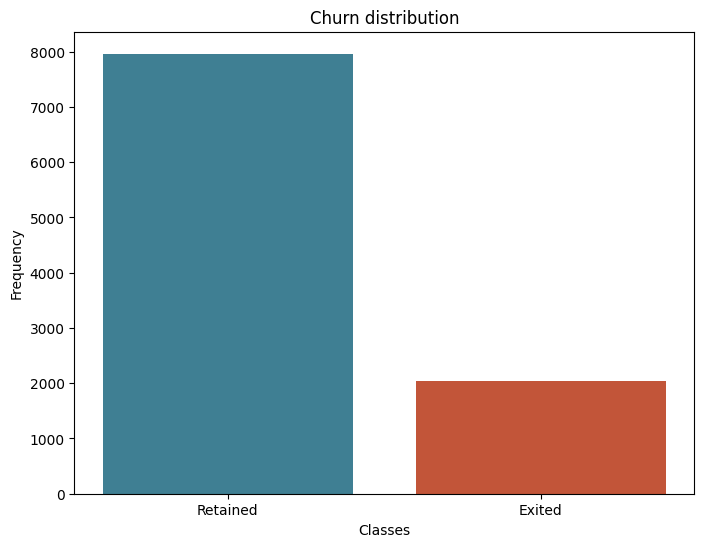

In [13]:
plt.figure(figsize=(8, 6))

labels = ['Retained', 'Exited']
colors = ['#3f7f93', '#c25539','#2c3e50','#f0e68c']

class_counts = [len(df[df['Exited'] == 0]), len(df[df['Exited'] == 1])]

plt.figure(figsize=(8, 6))
plt.bar(['Retained', 'Exited'], class_counts, color=[colors[0], colors[1]])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Churn distribution')

plt.show()

In [11]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

The barplots shows that :

- 20.4% of clients are exited.
- 79.6% of clients are retained.

Based on this distribution, we can say that we have an imbalanced dataset. The exited clients represent a minority class, making it almost a rare class.

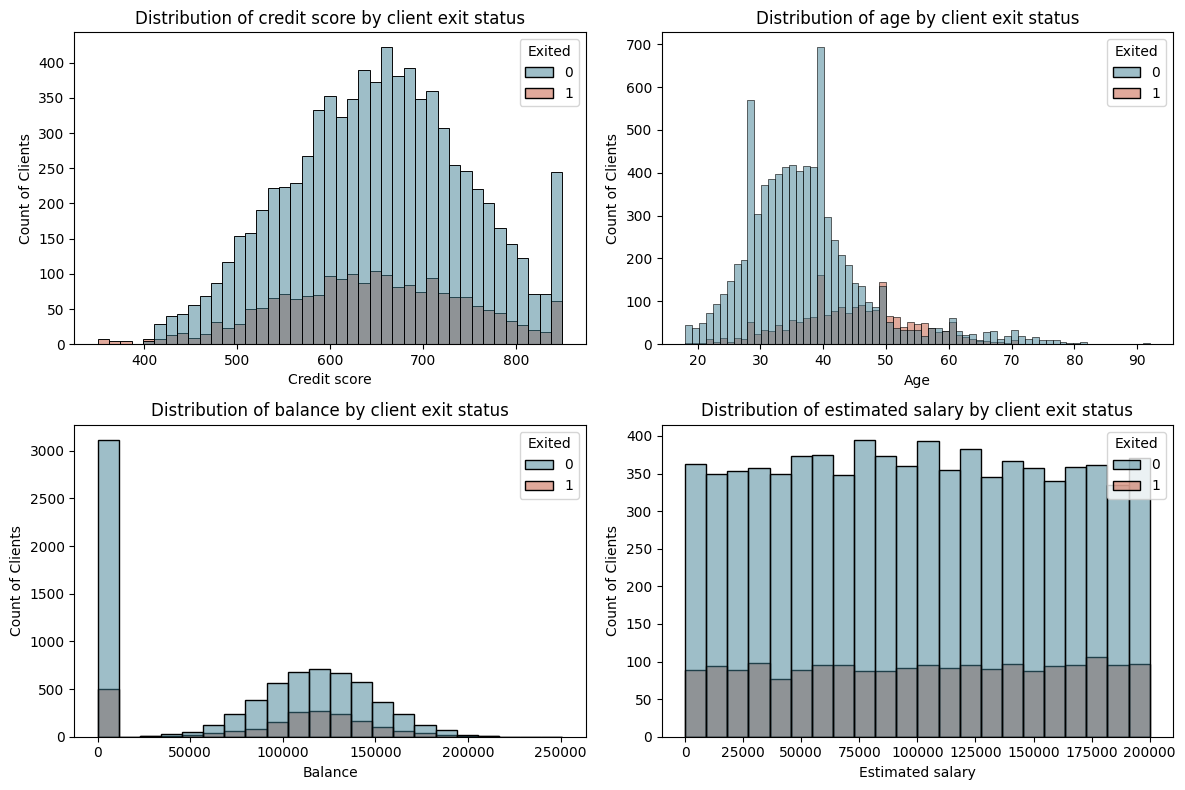

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) #creates a figure (fig) and a grid of subplots (axes) with 2 rows and 2 columns.

columns = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

titles = ["Credit score", "Age", "Balance", "Estimated salary"]


for ax, column, title in zip(axes.flatten(), columns, titles):#axes.flatten() converts the 2x3 grid of axes into a 1D array so that we can iterate over it easily.
    sns.histplot(x = df[column], hue=df['Exited'], ax=ax, palette=colors)
    ax.set_title(f"Distribution of {title.lower()} by client exit status", loc='center')
    ax.set_xlabel(title)
    ax.set_ylabel("Count of Clients")
# Adjust layout to prevent overlap    
plt.tight_layout()

plt.show()


**Distribution of Credit Score by Client Exit Status**
The histogram shows that a large number of clients have credit scores between 550 and 750, with approximately one-fourth of these clients having exited. A small number of clients with credit scores below 400 have exited. Additionally, there are about 250 clients with credit scores above 800, of which 60 have exited.

**Distribution of Age by Client Exit Status**
The age distribution ranges from 18 to 80. Most clients who leave are between 20 and 70 years old, with peak exit ages around 50, where approximately 200 clients have exited. Non-exited clients dominate.

**Distribution of Balance by Client Exit Status**
The histogram indicates that the majority of clients have no balance in their accounts. For those with a balance, it tends to range between 50,000 and 200,000.

**Distribution of Estimated Salary by Client Exit Status**
The estimated salaries range from 0 to 200,000, with a roughly equal number of clients across different salary ranges.

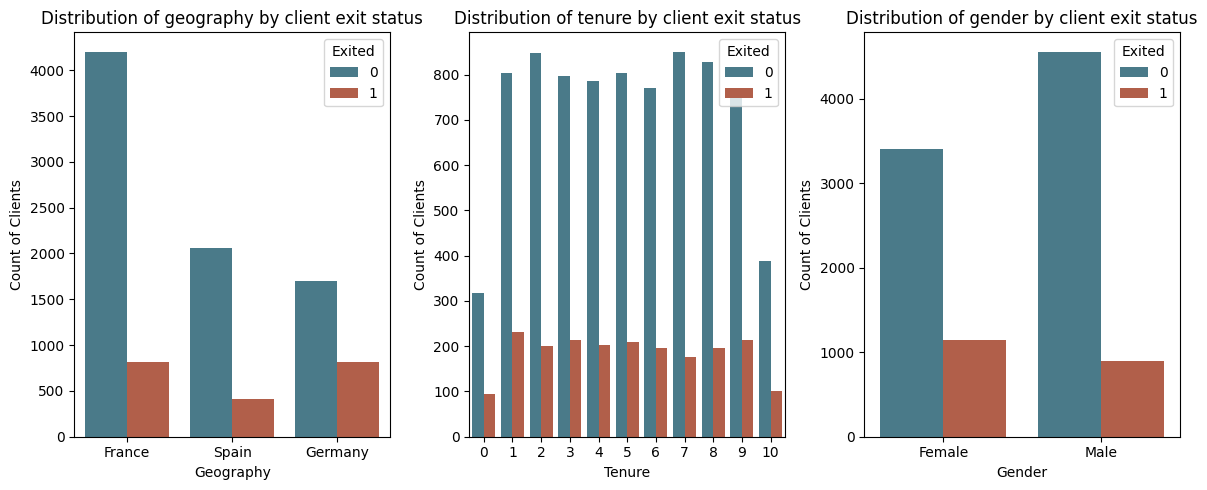

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

columns = ['Geography', 'Tenure', 'Gender']
titles = ["Geography", "Tenure", "Gender"]

for ax, column, title in zip(axes.flatten(), columns, titles): 
    sns.countplot(data=df, x=column, hue='Exited', ax=ax, palette=colors)
    ax.set_title(f"Distribution of {title.lower()} by client exit status", loc='center')
    ax.set_xlabel(title)
    ax.set_ylabel("Count of Clients")

plt.tight_layout()

plt.show()

**Distribution of Geography by Client Exit Status**
The plot shows that clients from Germany and France tend to leave more frequently, with the count of exited clients nearing 1,000 in each country. Conversely, Spain has the fewest exited clients, with the count nearing 500. In other hand France tend to have more non exited clients in comparaison with other countires.

**Distribution of Tenure by Client Exit Status**
The plot indicates that tenure ranges from 0 to 10 years. The number of exited clients increases to around 220 for tenures between 1 and 9 years, while the number of exited clients with tenures of 0 and 10 years is close to 100. Non-exited clients outnumber exited clients across all tenures.

**Distribution of Gender by Client Exit Status**
The number of retained clients is high across both genders. However, females tend to leave more frequently compared to males.

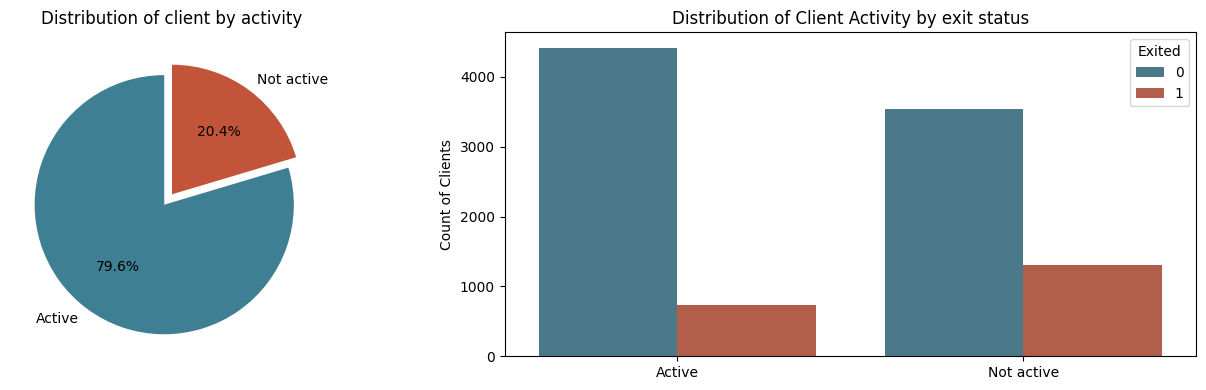

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

labels=['Active','Not active']
explode = (0.1, 0) 

df['Exited'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%', 
                                 colors=colors, 
                                 labels=labels, 
                                 startangle=90, 
                                 ax=axes[0],
                                 explode=explode
                                )
axes[0].set_title(f"Distribution of client by activity", loc='center')
axes[0].set_ylabel('')

df['IsActiveMember'] = df['IsActiveMember'].replace({0: labels[1], 1:labels[0]})
sns.countplot(data=df, x=df['IsActiveMember'], hue='Exited', ax=axes[1], palette=colors)
axes[1].set_title(f"Distribution of Client Activity by exit status", loc='center')
axes[1].set_xlabel("")
axes[1].set_ylabel("Count of Clients")
    
plt.tight_layout()

plt.show()


From the plots, we can observe that active members dominate, comprising 79% compared to 20% of inactive members. Additionally, inactive members are more likely to leave than active members. For non-exited members, the number of active members exceeds that of inactive members.

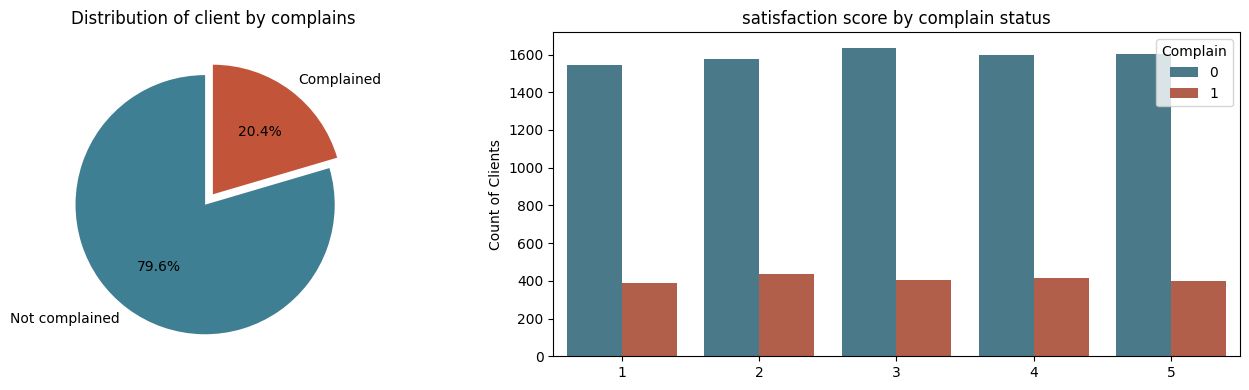

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
labels=['Not complained','Complained']

#1
df['Complain'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%', 
                                 colors=colors, 
                                 labels=labels, 
                                 startangle=90, 
                                 ax=axes[0],
                                 explode=explode
                                )
axes[0].set_title(f"Distribution of client by complains", loc='center')
axes[0].set_ylabel('')

#2
#df['Complain'].replace({'Not complained':0, 'complained':1})
sns.countplot(data=df, x=df['SatisfactionScore'], hue='Complain', ax=axes[1], palette=colors)
axes[1].set_title(f"satisfaction score by complain status", loc='center')
axes[1].set_xlabel("")
axes[1].set_ylabel("Count of Clients")

    
plt.tight_layout()

plt.show()


From the plots, we can see that the percentage of clients who did not complain is higher than those who did. However, among all levels of satisfaction scores, the number of clients who complained is higher than those who did not.

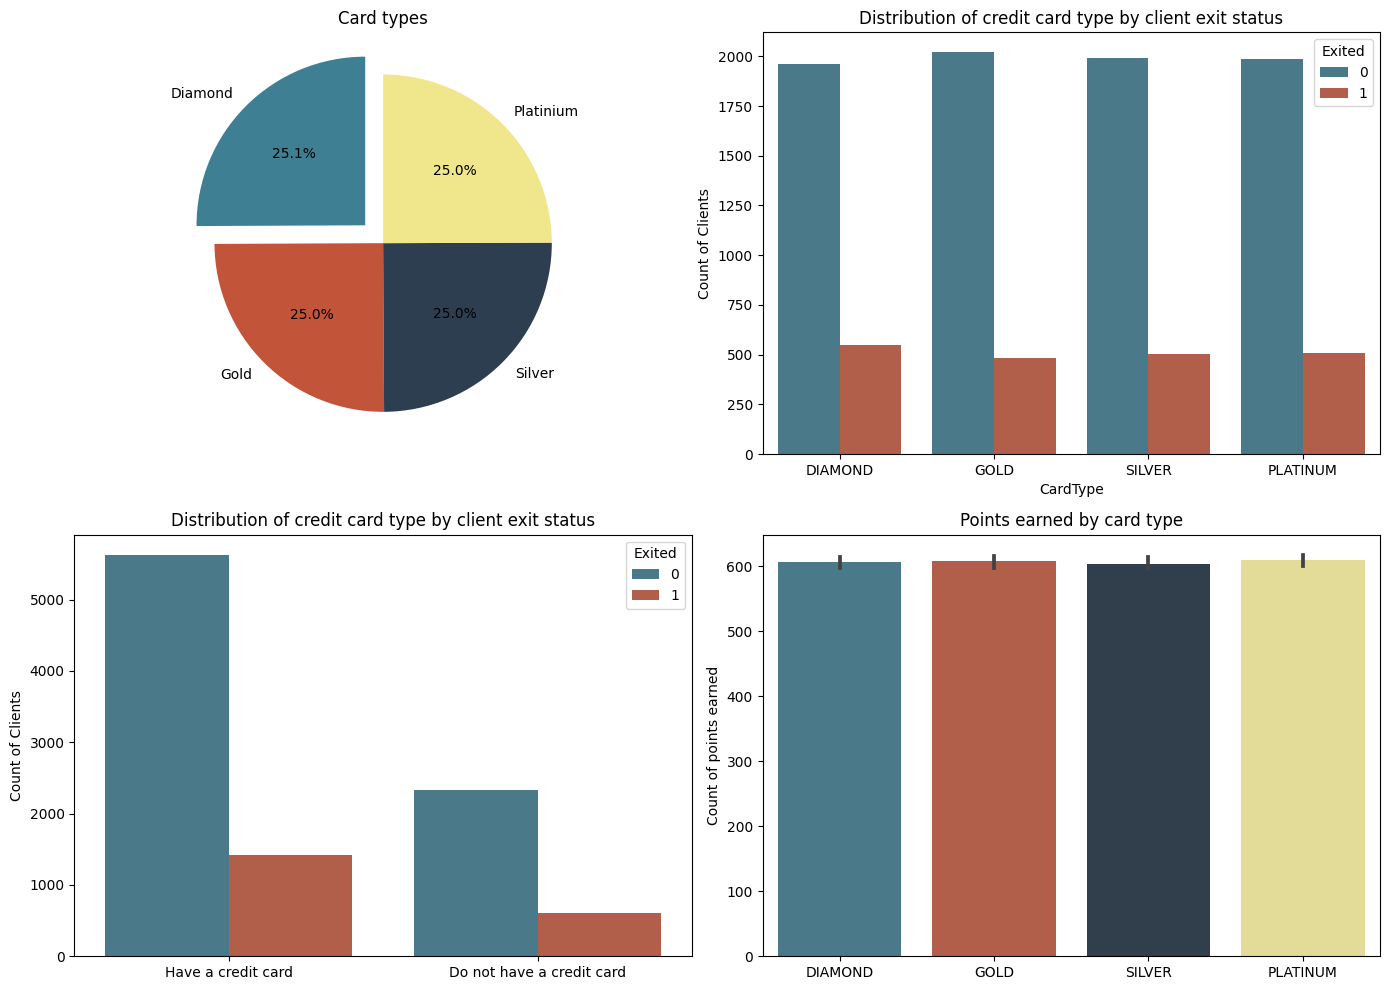

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

labels=['Diamond','Gold','Silver','Platinium']
explode = (0.15, 0, 0,0) 

#1
df['CardType'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%', 
                                 colors=colors, 
                                 labels=labels, 
                                 startangle=90, 
                                 ax=axes[0][0],
                                 explode=explode
                                )
axes[0][0].set_title("Card types", loc='center')
axes[0][0].set_ylabel('')

#2
sns.countplot(data=df, x='CardType', hue='Exited', ax=axes[0][1], palette=colors)
axes[0][1].set_title(f"Distribution of credit card type by client exit status", loc='center')
axes[0][1].set_ylabel("Count of Clients")

#3
df['HasCrCard'] = df['HasCrCard'].replace({0: 'Do not have a credit card', 1: 'Have a credit card'})
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=axes[1][0], palette=colors)
axes[1][0].set_title("Distribution of credit card type by client exit status", loc='center')
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("Count of Clients")

#4
sns.barplot(data=df, x='CardType', y='PointEarned', ax=axes[1][1], palette=colors)
axes[1][1].set_title("Points earned by card type", loc='center')
axes[1][1].set_xlabel("")
axes[1][1].set_ylabel("Count of points earned")


plt.tight_layout()

plt.show()


Based on the plots, the distribution of card types appears to be fairly even. Exiting clients show a preference for diamond cards over other types, while non-exiting clients tend to favor gold cards. Other card types show a more balanced distribution among non-exiting clients. Clients with credit cards are more likely to leave compared to those without. Additionally, the number of retained clients with credit cards exceeds those without. All types of credit cards achieve the maximum points, which is 600.

## 4. Feature engineering <a class="anchor" id="chapter4"></a>

In [9]:
df['HasCrCard']=df['HasCrCard'].replace({'Do not have a credit card':0,'Have a credit card':1})
df['Complain'] = df['Complain'].replace({'Not complained':0, 'complained':1})
df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active':0,'Active':1})

Convert categorical columns into quantitative columns :

In [9]:
categoricalCols = df.select_dtypes(include='object').columns
categoricalCols

Index(['Geography', 'Gender', 'CardType'], dtype='object')

In [10]:
for col in categoricalCols :
    print(df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [11]:
for col in categoricalCols :
    dummyVar= pd.get_dummies(df[col]).astype(int)
    df=pd.concat([df,dummyVar],axis=1)
    
df.drop(columns=categoricalCols,inplace=True)

In [12]:
df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,PointEarned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0,1,0,0,1,0,1,0,0
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,...,911,1,0,0,1,0,1,0,0,0


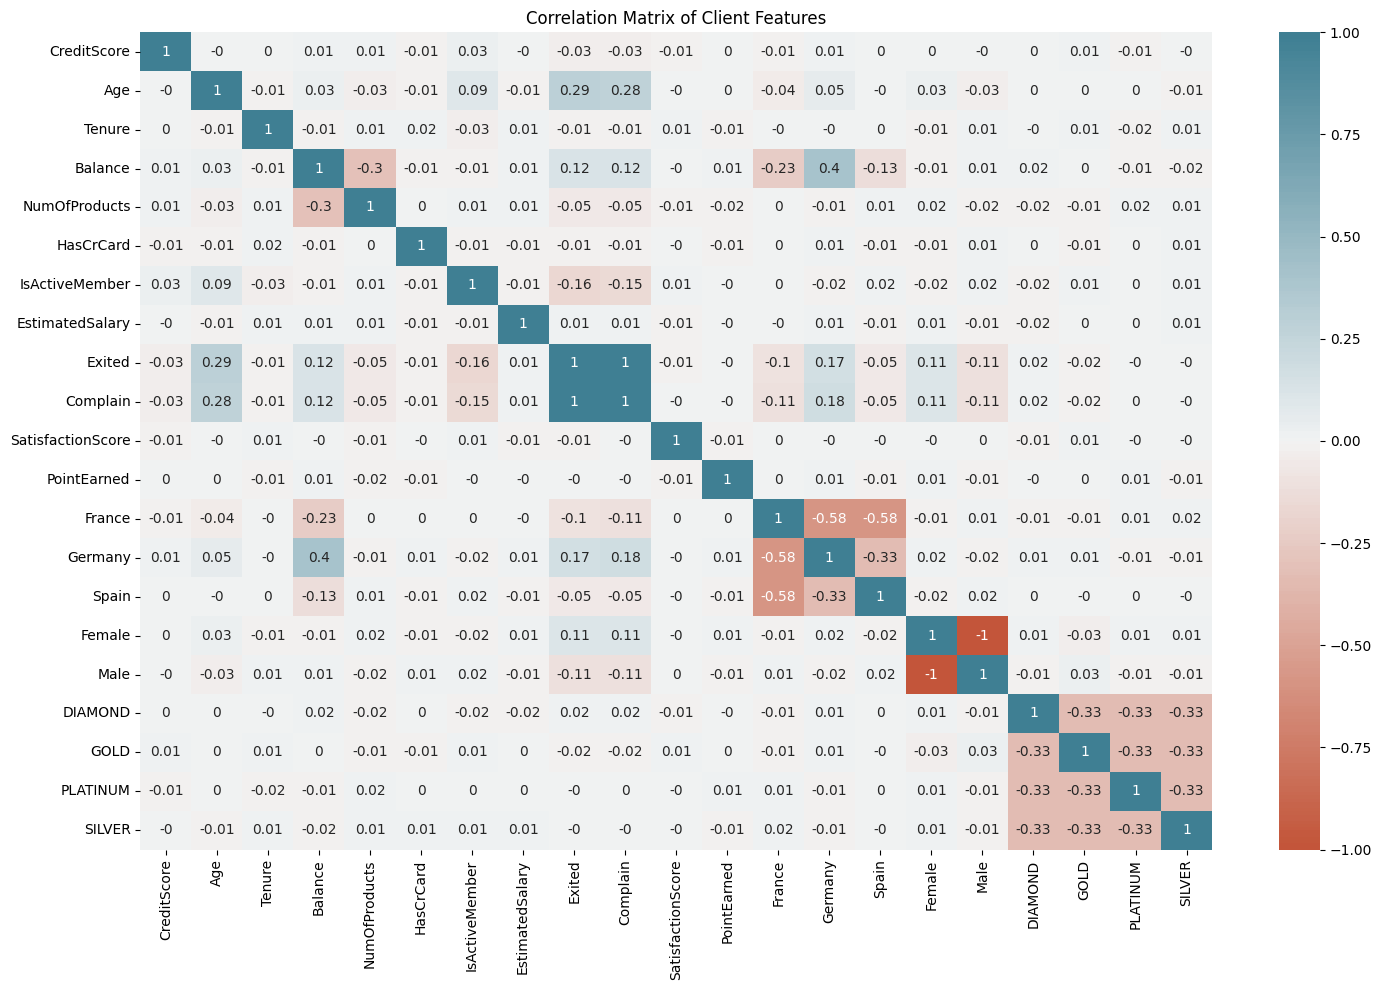

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap=sns.diverging_palette(20, 220, n=200), center=0)
plt.title('Correlation Matrix of Client Features', loc='center')
plt.tight_layout() 
plt.show()

This correlation matrix illustrates the relationships between various client features. A strong positive correlation (close to 1.0) indicates that as one feature increases, the other also tends to increase. Conversely, a strong negative correlation (close to -1.0) means that as one feature increases, the other tends to decrease. To optimize our feature selection, we will only consider features with correlations above +0.05 or below -0.05. If two features are highly correlated (greater than 0.7 or less than -0.7), we will drop the less interesting one. For example, 'Male' and 'Female' have a perfect negative correlation (-1). Since they provide the same information, we will include only 'Female' as positive correlations are typically easier to interpret. Additionally, 'Complain' has a high correlation with the target variable 'Exit', so retaining this feature might lead to overfitting.

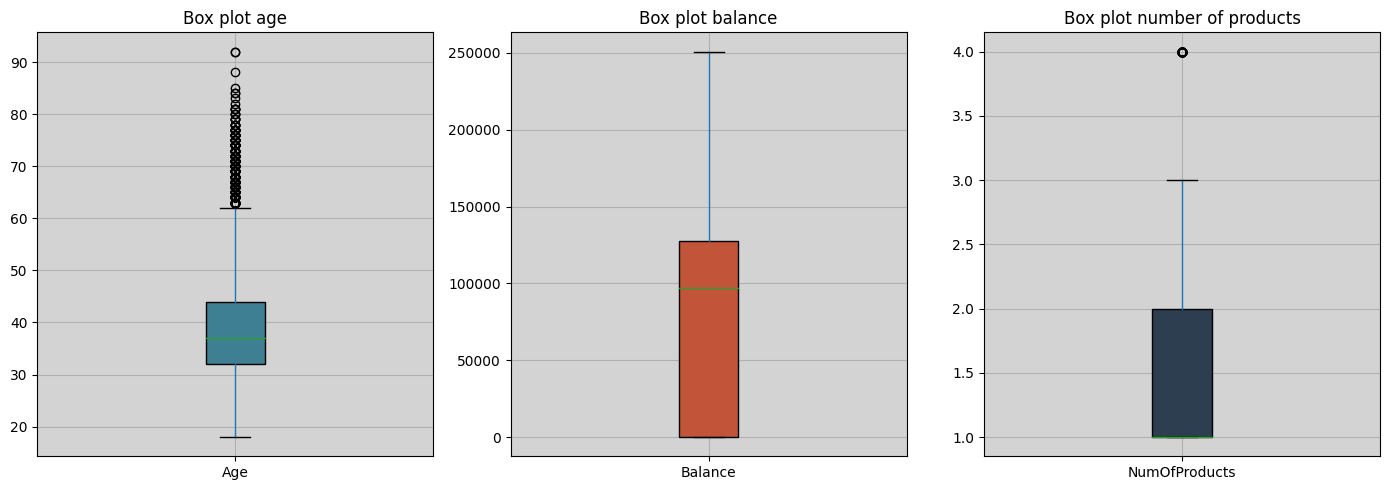

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

columns = ['Age', 'Balance', 'NumOfProducts']
titles = ['Age', 'Balance', 'Number of Products']
background_color = '#d3d3d3'

for ax, column, title, color in zip(axes.flatten(), columns, titles, colors):
    box = df[[column]].boxplot(ax=ax, patch_artist=True, boxprops=dict(facecolor=color))
    ax.set_facecolor(background_color)
    ax.set_title(f"Box plot {title.lower()}", loc='center')
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


Based on the previous visualization, we will retain our outliers. For age, the outliers represent a segment of clients that include both exited and non-exited clients, providing valuable insights. For the number of products, outliers are kept because the dataset includes up to 4 products, which is a valid business scenario.

## 5. Model Training & Evaluation <a class="anchor" id="chapter5"></a>

In [13]:
def record_results(model_name, X_desc, data_method, report, roc_auc, pr_auc, cm, best_params):
    metrics = {
        'precision_exited': report['0']['precision'],
        'recall_exited': report['0']['recall'],
        'f1_score_exited': report['0']['f1-score'],
        'precision_retained': report['1']['precision'],
        'recall_retained': report['1']['recall'],
        'f1_score_retained': report['1']['f1-score'],
        'accuracy': report['accuracy'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score'],
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }

    # Round values to 5 decimal places
    metrics = {k: round(v, 5) for k, v in metrics.items()}

    mlflow.log_param("Model", model_name)
    mlflow.log_param("Data-level Method", data_method)
    for parameter,value in best_params.items():
        mlflow.log_param(parameter, value)
    for metric, value in metrics.items():
        mlflow.log_metric(metric, value)

In [14]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt='d', ax = ax,cmap=sns.diverging_palette(20, 220, n=200), center=0); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Exited', 'Retained'])
    ax.yaxis.set_ticklabels(['Exited', 'Retained']) 
    plt.show()
    return cm

In [15]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    reportWtD = classification_report(Y_test, Y_pred, output_dict=False)
    print(reportWtD)
    roc_auc = roc_auc_score(Y_test, Y_pred)
    print(f"ROC AUC: {roc_auc}")
    precision, recall, _ = precision_recall_curve(Y_test, Y_pred)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc}")
    best_params = model.best_params_
    print("Tuned hyperparameters - Best parameters : ",best_params)
    cm = plot_confusion_matrix(Y_test,Y_pred)
    return report, roc_auc, pr_auc, cm, best_params, Y_pred

In [16]:
def run_grid_search(model_name, X_train, Y_train, X_test, Y_test, pipeline, param_grid, data_method):
    with mlflow.start_run(run_name=model_name):
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=stratified_kf)
        grid_search.fit(X_train, Y_train)
        report, roc_auc, pr_auc, cm, best_params,y_pred = evaluate_model(grid_search, X_test, Y_test)
        feature_names_str = ', '.join(X_train.columns)
        record_results(model_name, feature_names_str, data_method, report, roc_auc, pr_auc, cm, best_params)
        
        signature = infer_signature(X_test, y_pred)
        mlflow.sklearn.log_model(
        sk_model=grid_search,
        artifact_path="sklearn-model",
        signature=signature,#Defines the schema for model inputs, outputs, and additional inference parameters, promoting a standardized interface for model interaction.
        registered_model_name=model_name,
    )   
        
    return grid_search

In [17]:
Y=pd.Series(df['Exited'].to_numpy())
X = df[['Age','Balance', 'IsActiveMember','NumOfProducts','France','Germany','Spain','Female']]
Y.tail(5)

9995    0
9996    0
9997    1
9998    1
9999    0
dtype: int64

In [18]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=42, stratify=Y)
#stratify ensures that the train-test split maintains the same proportion of classes as the original dataset.

In [26]:
Y_train_series = pd.Series(Y_train)
Y_test_series = pd.Series(Y_test)

# Calculate the proportion of classes in Y_train
train_class_proportions = Y_train_series.value_counts(normalize=True)
print(f"Train class proportions:\n{train_class_proportions}")

# Calculate the proportion of classes in Y_test
test_class_proportions = Y_test_series.value_counts(normalize=True)
print(f"Test class proportions:\n{test_class_proportions}")


Train class proportions:
0    0.796143
1    0.203857
Name: proportion, dtype: float64
Test class proportions:
0    0.796333
1    0.203667
Name: proportion, dtype: float64


In [19]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#sets up a 5-fold stratified cross-validation with shuffling enabled(reorder the data), ensuring that each fold maintains the class distribution of the dataset.

### 🌳 5.1 Decision Tree <a class="anchor" id="m1"></a>

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.69      0.48      0.57       611

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000

ROC AUC: 0.7113447545659012
Precision-Recall AUC: 0.6387229094810469
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


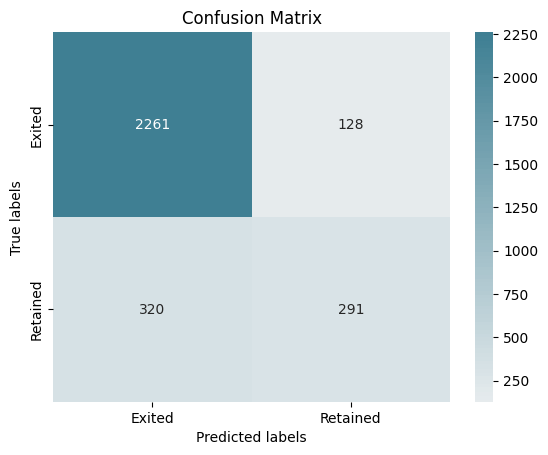

Successfully registered model 'Decision Tree'.
2024/07/31 10:18:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision Tree, version 1
Created version '1' of model 'Decision Tree'.
2024/07/31 10:18:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/7fa338a575b54017b58125bf29bb8e19.
2024/07/31 10:18:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2389
           1       0.59      0.54      0.56       611

    accuracy                           0.83      3000
   macro avg       0.74      0.72      0.73      3000
weighted avg       0.82      0.83      0.83      3000

ROC AUC: 0.7212839261234834
Precision-Recall AUC: 0.6099552573259728
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


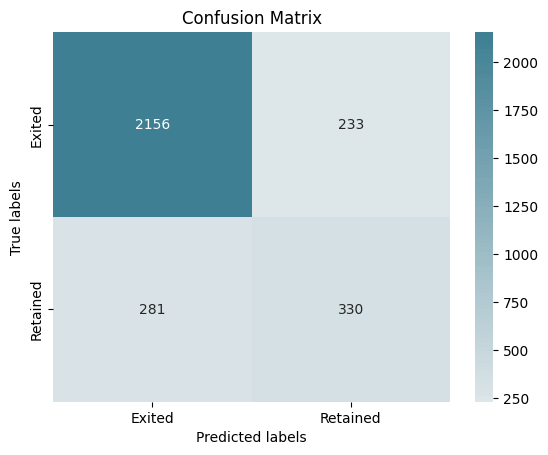

Successfully registered model 'Decision Tree(Oversampling)'.
2024/07/31 10:21:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision Tree(Oversampling), version 1
Created version '1' of model 'Decision Tree(Oversampling)'.
2024/07/31 10:21:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree(Oversampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/1fe58e5f92774f299a70b34602908f11.
2024/07/31 10:21:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2389
           1       0.46      0.72      0.56       611

    accuracy                           0.77      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.82      0.77      0.79      3000

ROC AUC: 0.7491969124718516
Precision-Recall AUC: 0.6154062861500758
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 11, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 7}


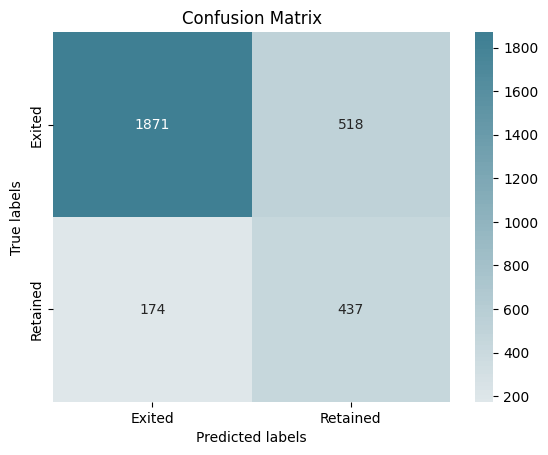

Successfully registered model 'Decision Tree(SMOTE)'.
2024/07/31 10:26:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision Tree(SMOTE), version 1
Created version '1' of model 'Decision Tree(SMOTE)'.
2024/07/31 10:26:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree(SMOTE) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/1691d7d6edbc4aa099e2642d5f37f28b.
2024/07/31 10:26:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.93      0.76      0.83      2389
           1       0.45      0.77      0.56       611

    accuracy                           0.76      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.76      0.78      3000

ROC AUC: 0.7621980586142569
Precision-Recall AUC: 0.63079705400982
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}


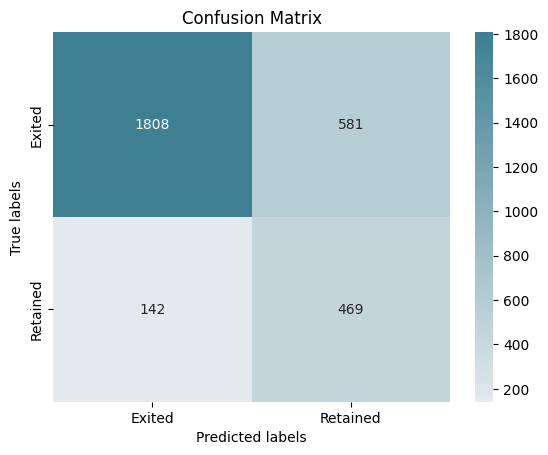

Successfully registered model 'Decision Tree(Undersampling)'.
2024/07/31 10:28:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision Tree(Undersampling), version 1
Created version '1' of model 'Decision Tree(Undersampling)'.
2024/07/31 10:28:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree(Undersampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/f6cbb1c1ccc84c55bbba914bc2c66161.
2024/07/31 10:28:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('undersample',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 4, 5, 6, 7, 9, 11],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 6, 8],
                         'classifier__min_samples_split': [2, 3, 4, 5, 6, 7]})

In [22]:
parameters_tree = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 4, 5, 6, 7, 9, 11],
    'classifier__min_samples_split': [2, 3, 4, 5, 6, 7],
    'classifier__min_samples_leaf': [1, 2, 4, 6, 8],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': [None, 'balanced']
}

pipeline_tree= Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_tree_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_tree_over = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_tree_under = Pipeline([
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

run_grid_search("Decision Tree",X_train, Y_train, X_test, Y_test, pipeline_tree, parameters_tree, 'None')
run_grid_search("Decision Tree(Oversampling)",X_train, Y_train, X_test, Y_test, pipeline_tree_over, parameters_tree, 'Oversampling')
run_grid_search("Decision Tree(SMOTE)",X_train, Y_train, X_test, Y_test, pipeline_tree_smote, parameters_tree, 'SMOTE')
run_grid_search("Decision Tree(Undersampling)",X_train, Y_train, X_test, Y_test, pipeline_tree_under, parameters_tree, 'Undersampling')

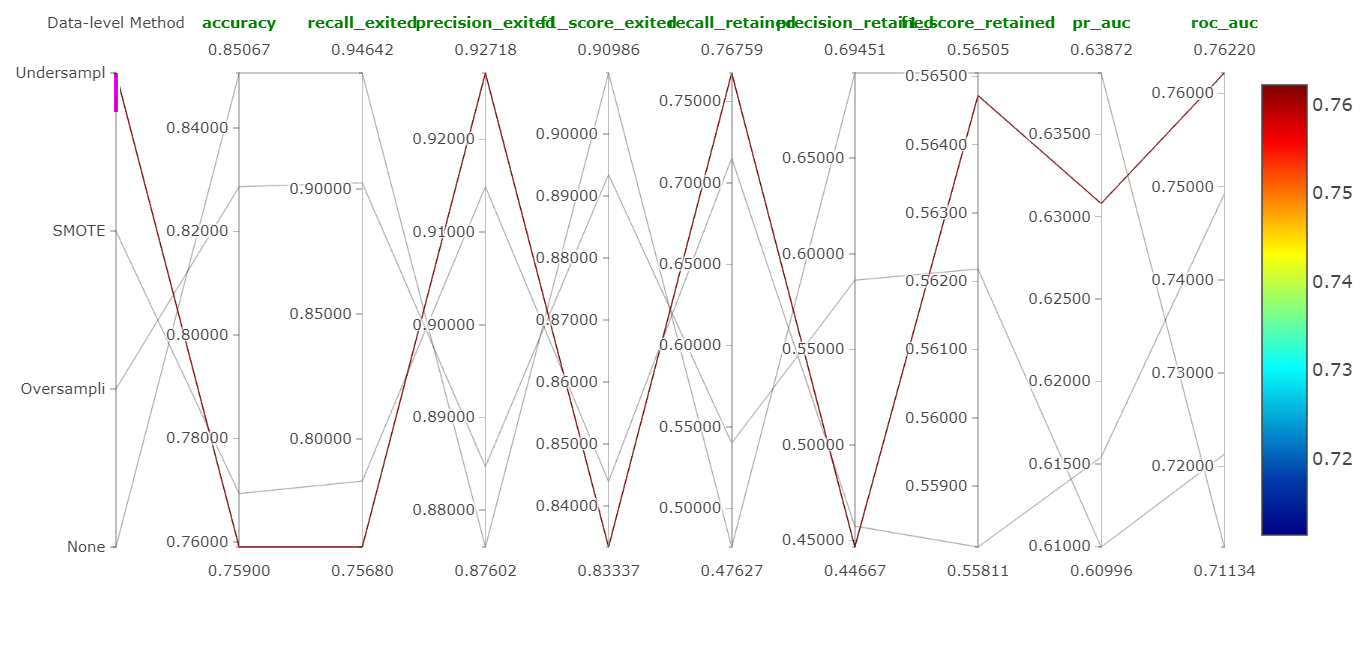
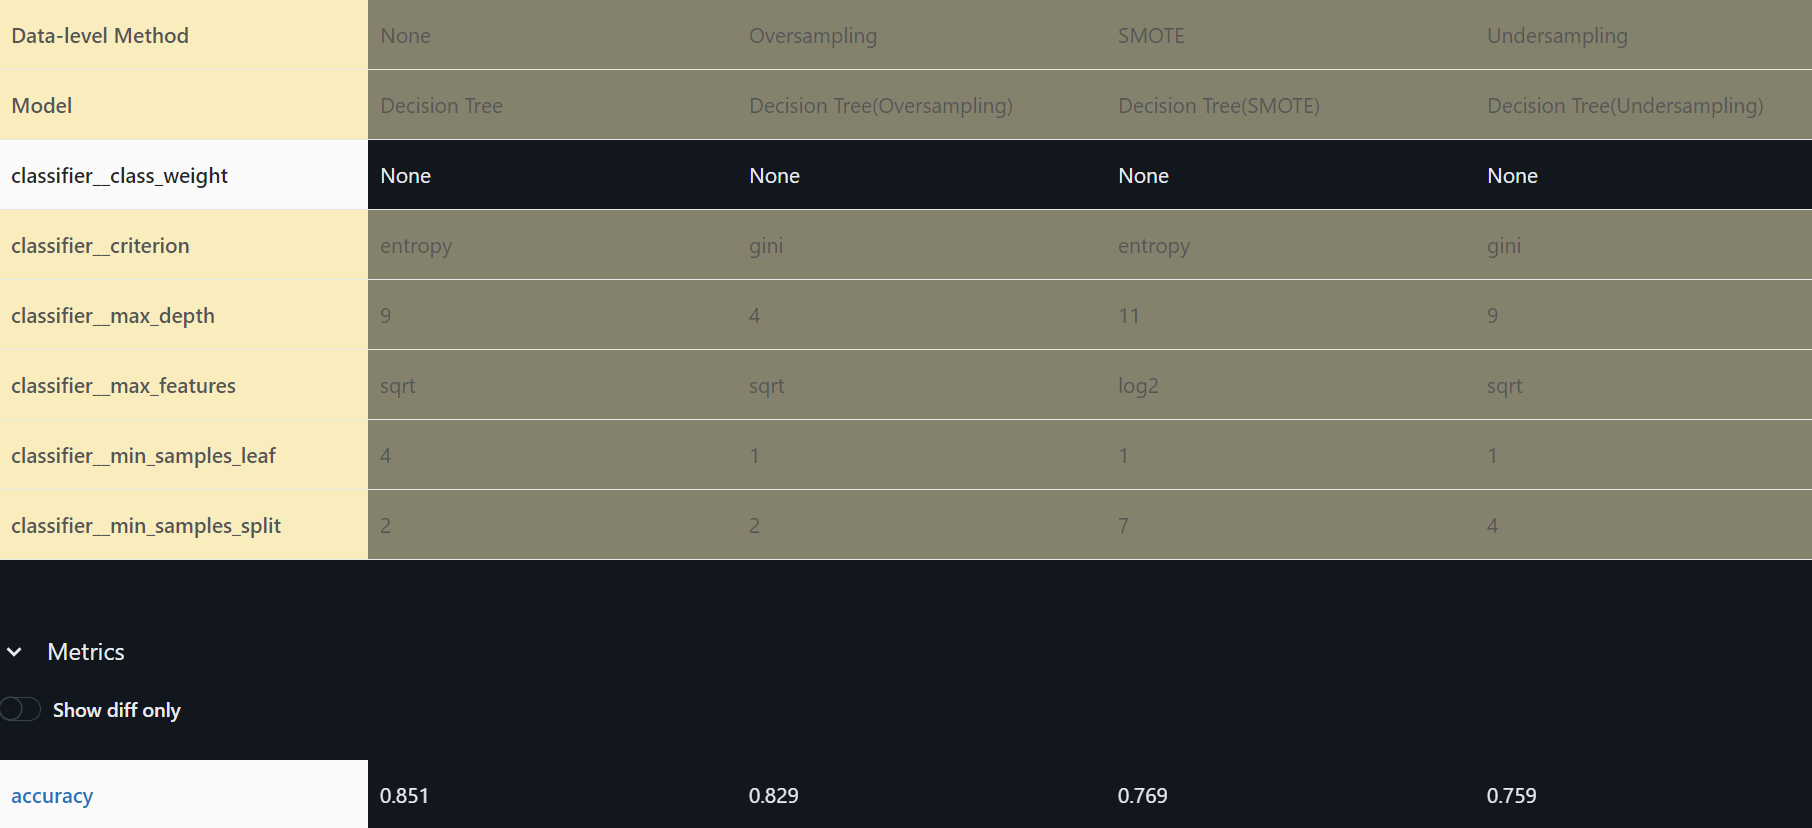
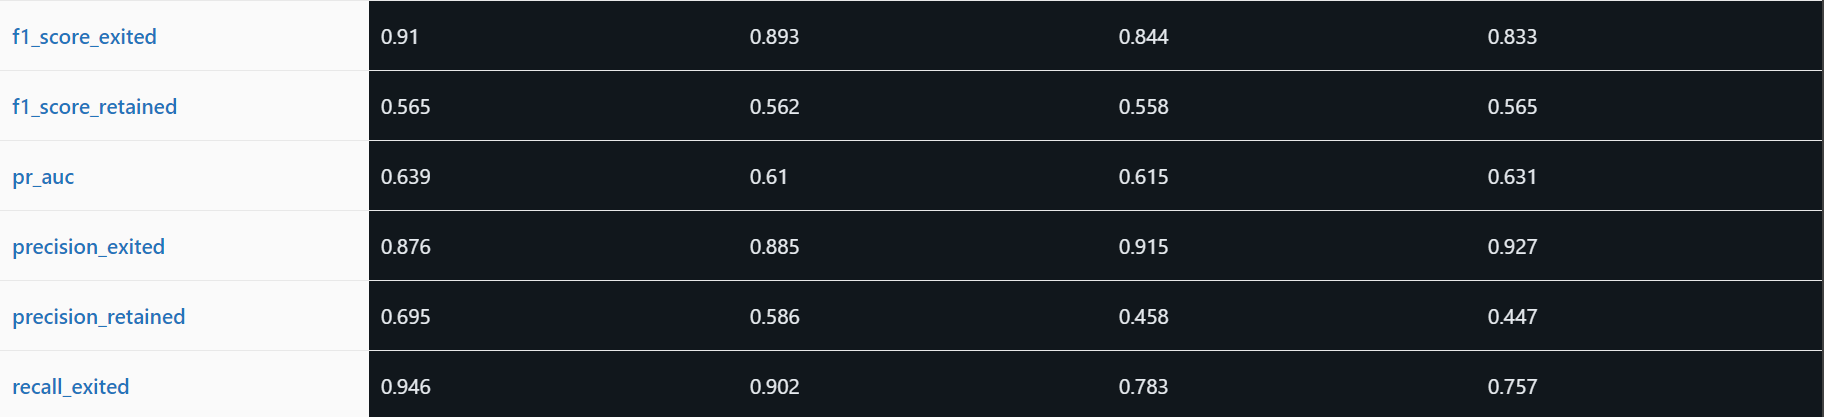
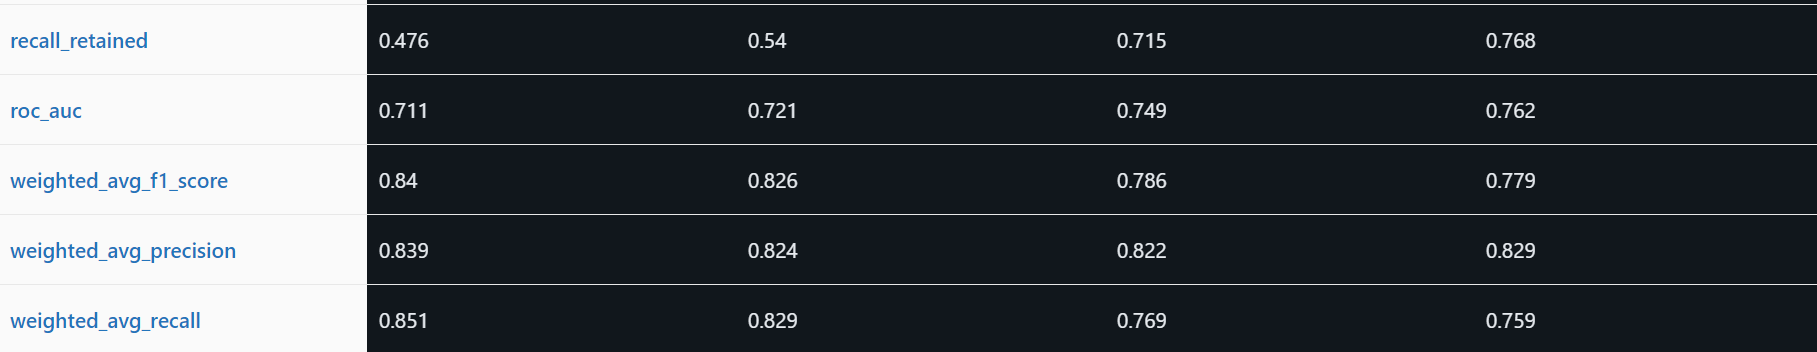
Model 1 has the highest accuracy (0.85) and the best precision, recall, and F1-score for the majority class (class 0). However, its performance on the minority class (class 1) is lower compared to others.
Model 2 also has good accuracy (0.83) but shows lower performance for the minority class.
Model 3 and Model 4 have lower accuracy (0.77 and 0.76 respectively) but perform better in terms of recall for the minority class. Their ROC AUC values (0.749 and 0.762) indicate better overall class discrimination.
Model 4 has the highest ROC AUC (0.762), suggesting it distinguishes well between classes, and also a strong precision-recall AUC.

**Model 4** seems to be the best choice. It has the highest ROC AUC, good precision-recall AUC, and reasonable performance metrics overall

### 📈 5.2 Logistic Regression <a class="anchor" id="m3"></a>

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.64      0.21      0.32       611

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.79      0.81      0.78      3000

ROC AUC: 0.589677250957231
Precision-Recall AUC: 0.505246317512275
Tuned hyperparameters - Best parameters :  {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


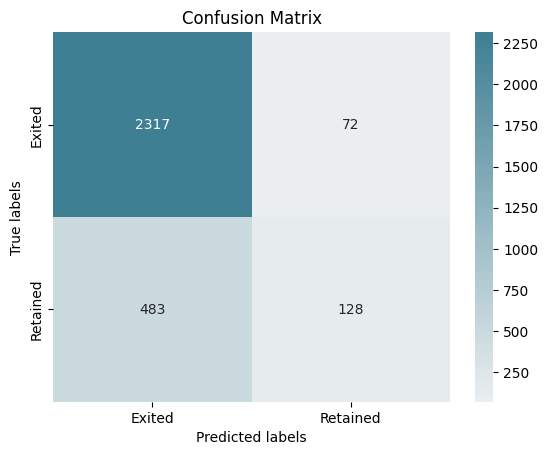

Successfully registered model 'Logistic Regression'.
2024/07/31 09:55:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 1
Created version '1' of model 'Logistic Regression'.
2024/07/31 09:55:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/04701c96c52e45d999cf2debfc908330.
2024/07/31 09:55:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2389
           1       0.40      0.73      0.52       611

    accuracy                           0.73      3000
   macro avg       0.66      0.73      0.66      3000
weighted avg       0.81      0.73      0.75      3000

ROC AUC: 0.7258523963145321
Precision-Recall AUC: 0.5926189984111245
Tuned hyperparameters - Best parameters :  {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


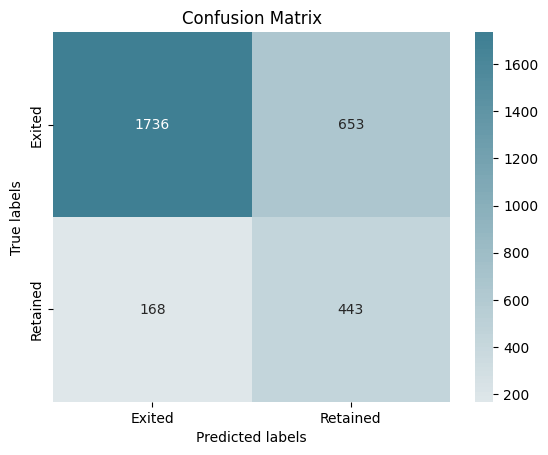

Successfully registered model 'Logistic Regression(Oversampling)'.
2024/07/31 09:55:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression(Oversampling), version 1
Created version '1' of model 'Logistic Regression(Oversampling)'.
2024/07/31 09:55:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression(Oversampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/53d4c9eff01641fe8b267c27d37ee07a.
2024/07/31 09:55:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2389
           1       0.40      0.73      0.52       611

    accuracy                           0.73      3000
   macro avg       0.66      0.73      0.66      3000
weighted avg       0.81      0.73      0.75      3000

ROC AUC: 0.7254338111324476
Precision-Recall AUC: 0.5922508772086729
Tuned hyperparameters - Best parameters :  {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


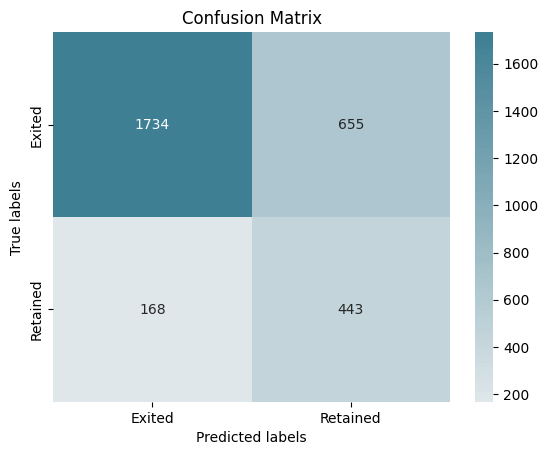

Successfully registered model 'Logistic Regression(SMOTE)'.
2024/07/31 09:55:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression(SMOTE), version 1
Created version '1' of model 'Logistic Regression(SMOTE)'.
2024/07/31 09:55:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression(SMOTE) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/8281c2b943524c2b8c0a793de870eb27.
2024/07/31 09:55:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2389
           1       0.40      0.74      0.52       611

    accuracy                           0.72      3000
   macro avg       0.66      0.73      0.66      3000
weighted avg       0.81      0.72      0.74      3000

ROC AUC: 0.7253019328222164
Precision-Recall AUC: 0.5936699257844682
Tuned hyperparameters - Best parameters :  {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


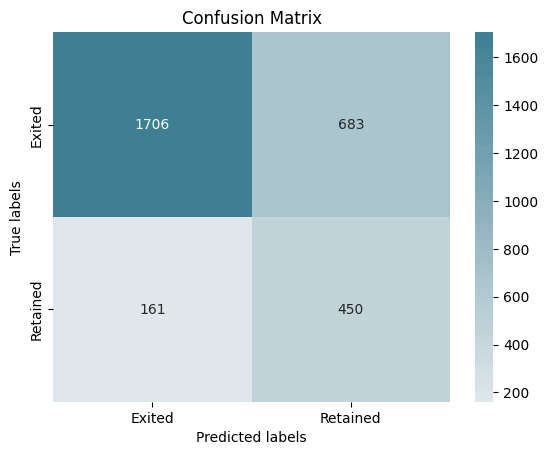

Successfully registered model 'Logistic Regression(Undersampling)'.
2024/07/31 09:55:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression(Undersampling), version 1
Created version '1' of model 'Logistic Regression(Undersampling)'.
2024/07/31 09:55:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression(Undersampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/c018e24b16e849e38f856d7e6f503d70.
2024/07/31 09:55:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('undersample',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']})

In [20]:
parameters_lr = {
    'classifier__C': [0.01,0.1,1],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__class_weight': [None, 'balanced']
}

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_lr_over = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_lr_under = Pipeline([
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_lr_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

run_grid_search("Logistic Regression",X_train, Y_train, X_test, Y_test, pipeline_lr, parameters_lr, 'None')
run_grid_search("Logistic Regression(Oversampling)",X_train, Y_train, X_test, Y_test, pipeline_lr_over, parameters_lr, 'Oversampling')
run_grid_search("Logistic Regression(SMOTE)",X_train, Y_train, X_test, Y_test, pipeline_lr_smote, parameters_lr, 'SMOTE')
run_grid_search("Logistic Regression(Undersampling)",X_train, Y_train, X_test, Y_test, pipeline_lr_under, parameters_lr, 'Undersampling')

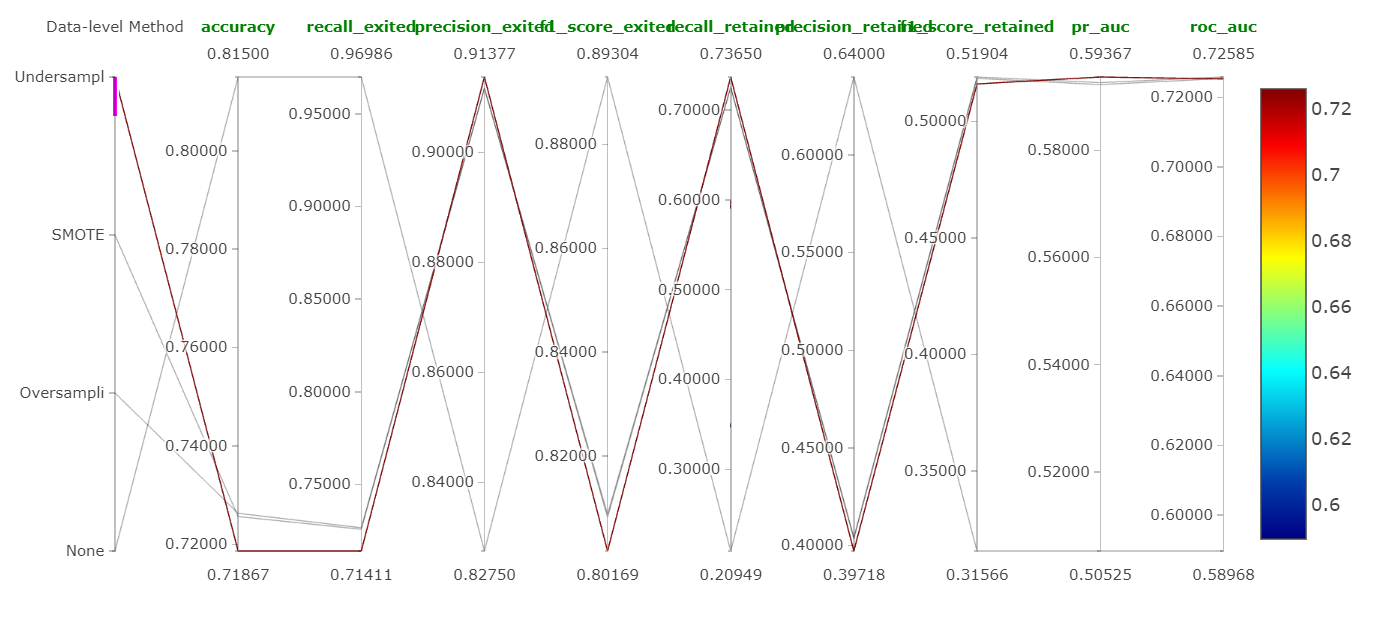
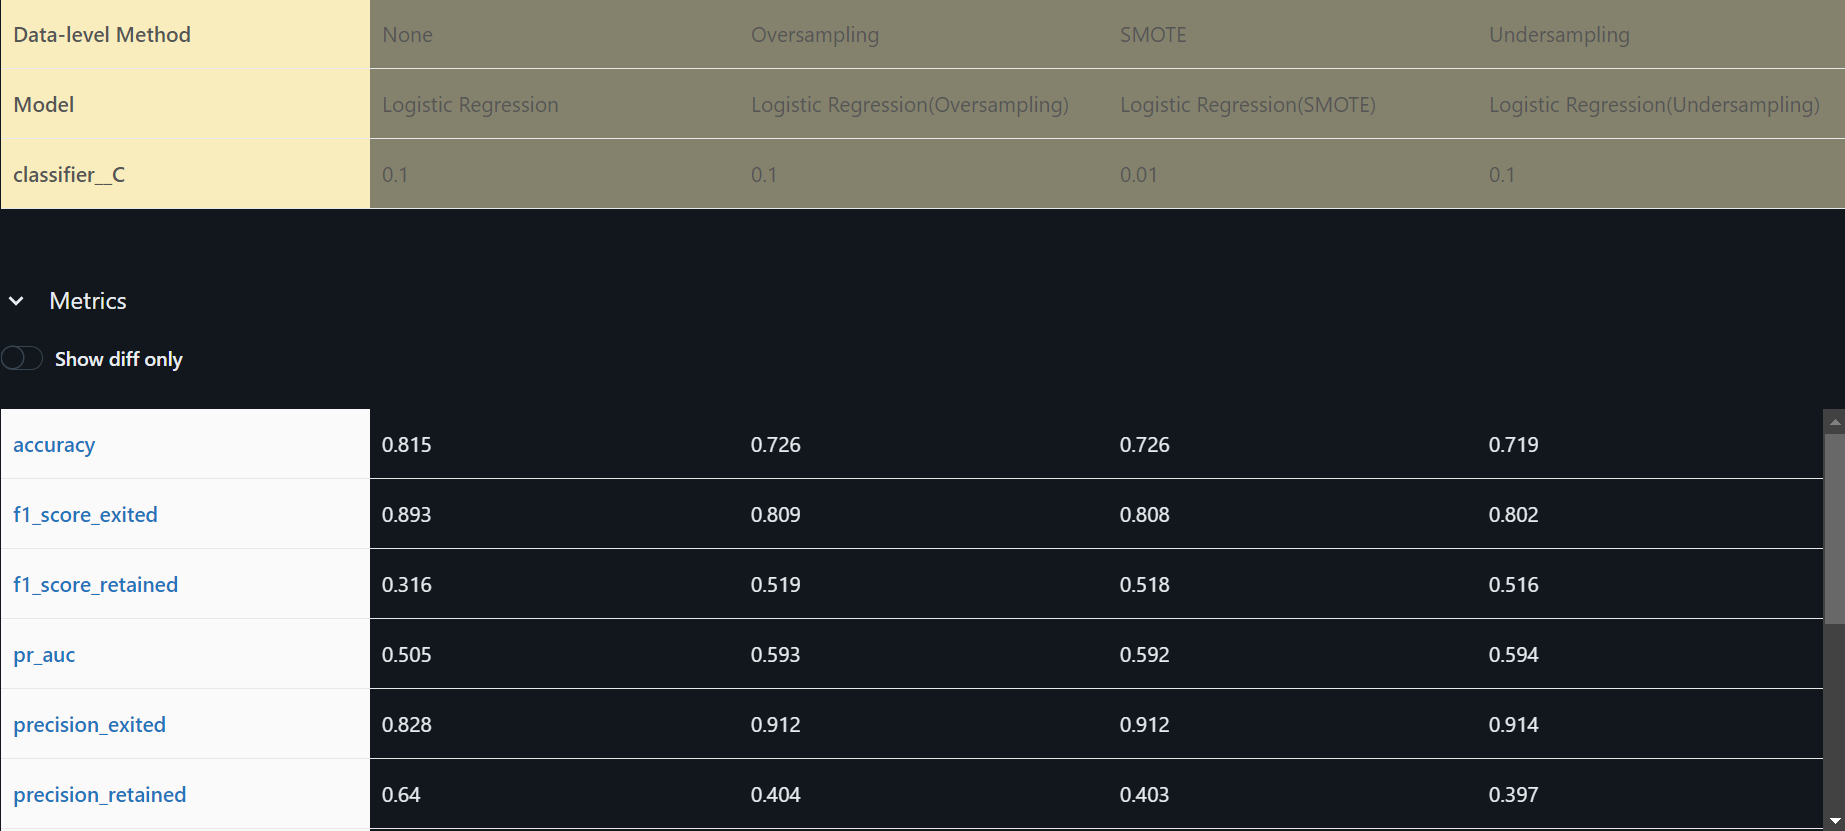
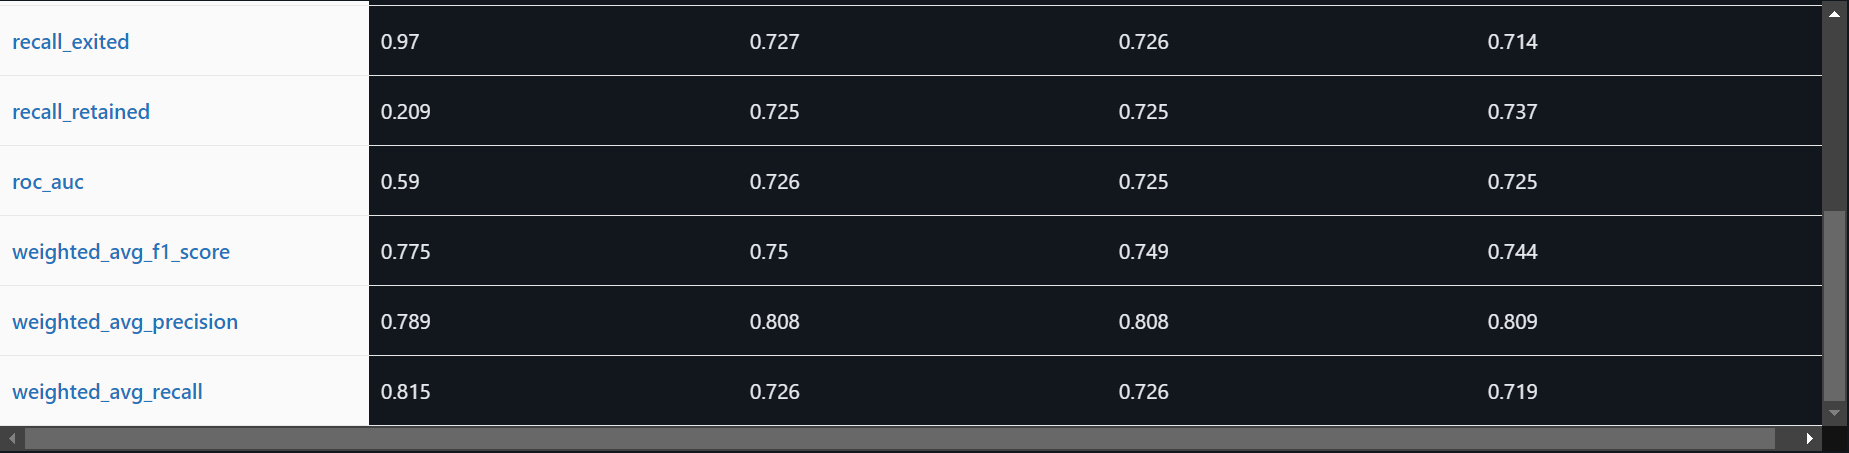

Model 1 has high precision and recall for class 0 but performs poorly on class 1, resulting in a low ROC AUC and Precision-Recall AUC. This suggests it’s not effective at identifying churned customers (class 1).

Models 2, 3, and 4 have similar performance:

They have a balanced recall between class 0 and class 1, indicating they can identify churned customers better than Model 1. The ROC AUC and Precision-Recall AUC values are higher, showing better discrimination and predictive performance for class 1.

We will chose **Model 4** due to its slightly higher Precision-Recall AUC.

### 📍 5.3 KNN <a class="anchor" id="m4"></a>

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2389
           1       0.72      0.51      0.60       611

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000

ROC AUC: 0.7287766693910099
Precision-Recall AUC: 0.6651545156970688
Tuned hyperparameters - Best parameters :  {'classifier__algorithm': 'brute', 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform'}


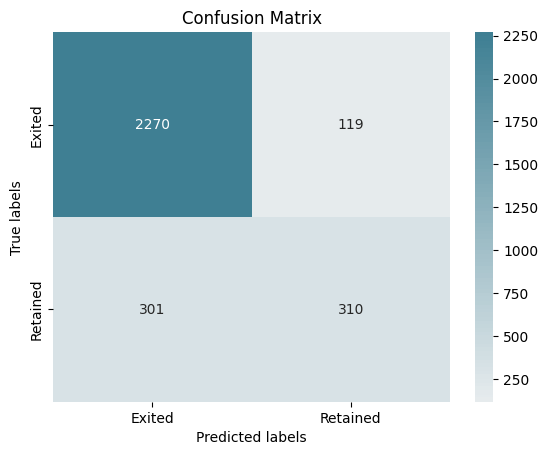

Successfully registered model 'KNN'.
2024/07/31 10:07:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN, version 1
Created version '1' of model 'KNN'.
2024/07/31 10:07:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNN at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/482f08d27aa144c0b7a8991686cc2e2d.
2024/07/31 10:07:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2389
           1       0.49      0.52      0.50       611

    accuracy                           0.79      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.79      0.79      3000

ROC AUC: 0.6884982931178705
Precision-Recall AUC: 0.5509155236218013
Tuned hyperparameters - Best parameters :  {'classifier__algorithm': 'brute', 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 1, 'classifier__p': 2, 'classifier__weights': 'uniform'}


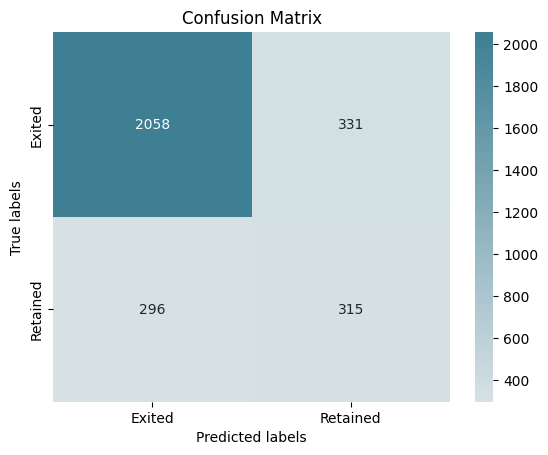

Successfully registered model 'KNN(Oversampling)'.
2024/07/31 10:10:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN(Oversampling), version 1
Created version '1' of model 'KNN(Oversampling)'.
2024/07/31 10:10:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNN(Oversampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/dc54214bc1d74d299481bc4e81266db9.
2024/07/31 10:10:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2389
           1       0.49      0.66      0.56       611

    accuracy                           0.79      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.82      0.79      0.80      3000

ROC AUC: 0.7419031855634012
Precision-Recall AUC: 0.6095235081639648
Tuned hyperparameters - Best parameters :  {'classifier__algorithm': 'auto', 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'distance'}


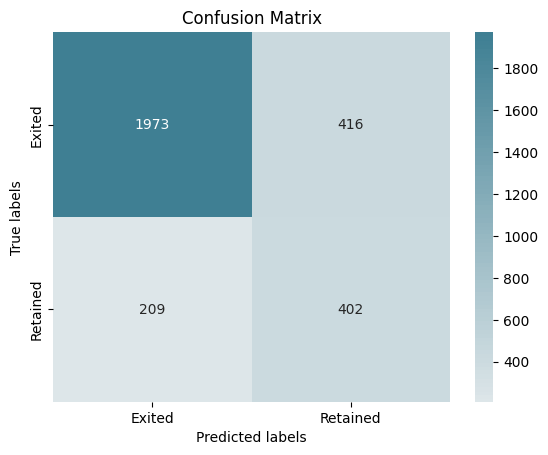

Successfully registered model 'KNN(SMOTE)'.
2024/07/31 10:12:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN(SMOTE), version 1
Created version '1' of model 'KNN(SMOTE)'.
2024/07/31 10:12:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNN(SMOTE) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/2e939bc20a41441e8a6e95089294a114.
2024/07/31 10:12:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2389
           1       0.48      0.78      0.59       611

    accuracy                           0.78      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.84      0.78      0.80      3000

ROC AUC: 0.7809025134978307
Precision-Recall AUC: 0.6512213481482699
Tuned hyperparameters - Best parameters :  {'classifier__algorithm': 'brute', 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform'}


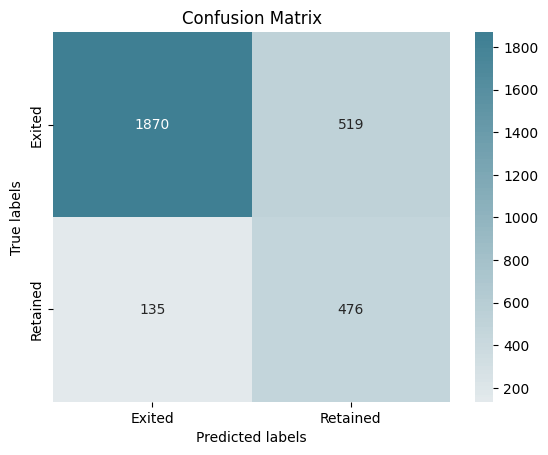

Successfully registered model 'KNN(Undersampling)'.
2024/07/31 10:14:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN(Undersampling), version 1
Created version '1' of model 'KNN(Undersampling)'.
2024/07/31 10:14:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNN(Undersampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/e11e11fdb0ac46a08cf2bf1685a7a4f3.
2024/07/31 10:14:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('undersample',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__n_neighbors': [1, 3, 5, 7, 9],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']})

In [21]:
parameters_knn = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2],
    'classifier__metric': ['minkowski','euclidean','manhattan'],
    'classifier__weights': ['uniform','distance']#'uniform': All neighbors are weighted equally. 'distance': Neighbors are weighted by the inverse of their distance. Closer neighbors have more influence.
}

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

pipeline_knn_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])


pipeline_knn_over = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

pipeline_knn_under = Pipeline([
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

run_grid_search("KNN",X_train, Y_train, X_test, Y_test, pipeline_knn, parameters_knn, 'None')
run_grid_search("KNN(Oversampling)",X_train, Y_train, X_test, Y_test, pipeline_knn_over, parameters_knn, 'Oversampling')
run_grid_search("KNN(SMOTE)",X_train, Y_train, X_test, Y_test, pipeline_knn_smote, parameters_knn, 'SMOTE')
run_grid_search("KNN(Undersampling)",X_train, Y_train, X_test, Y_test, pipeline_knn_under, parameters_knn, 'Undersampling')

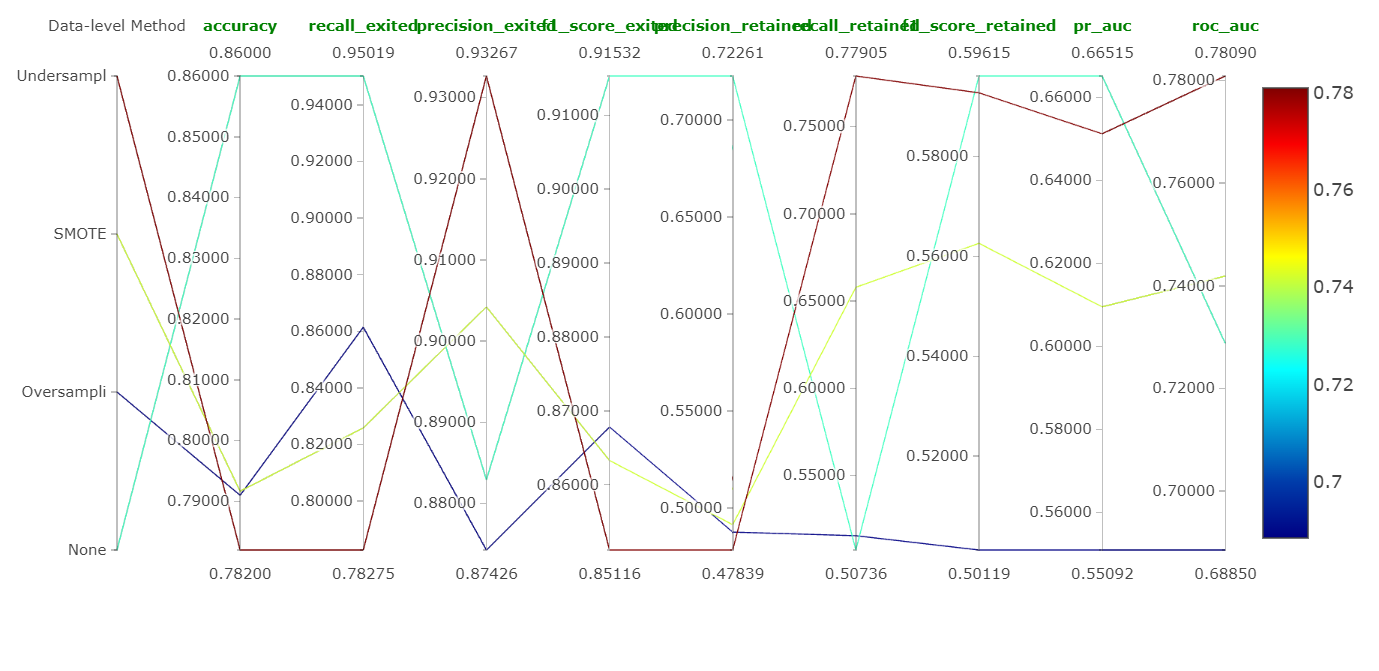
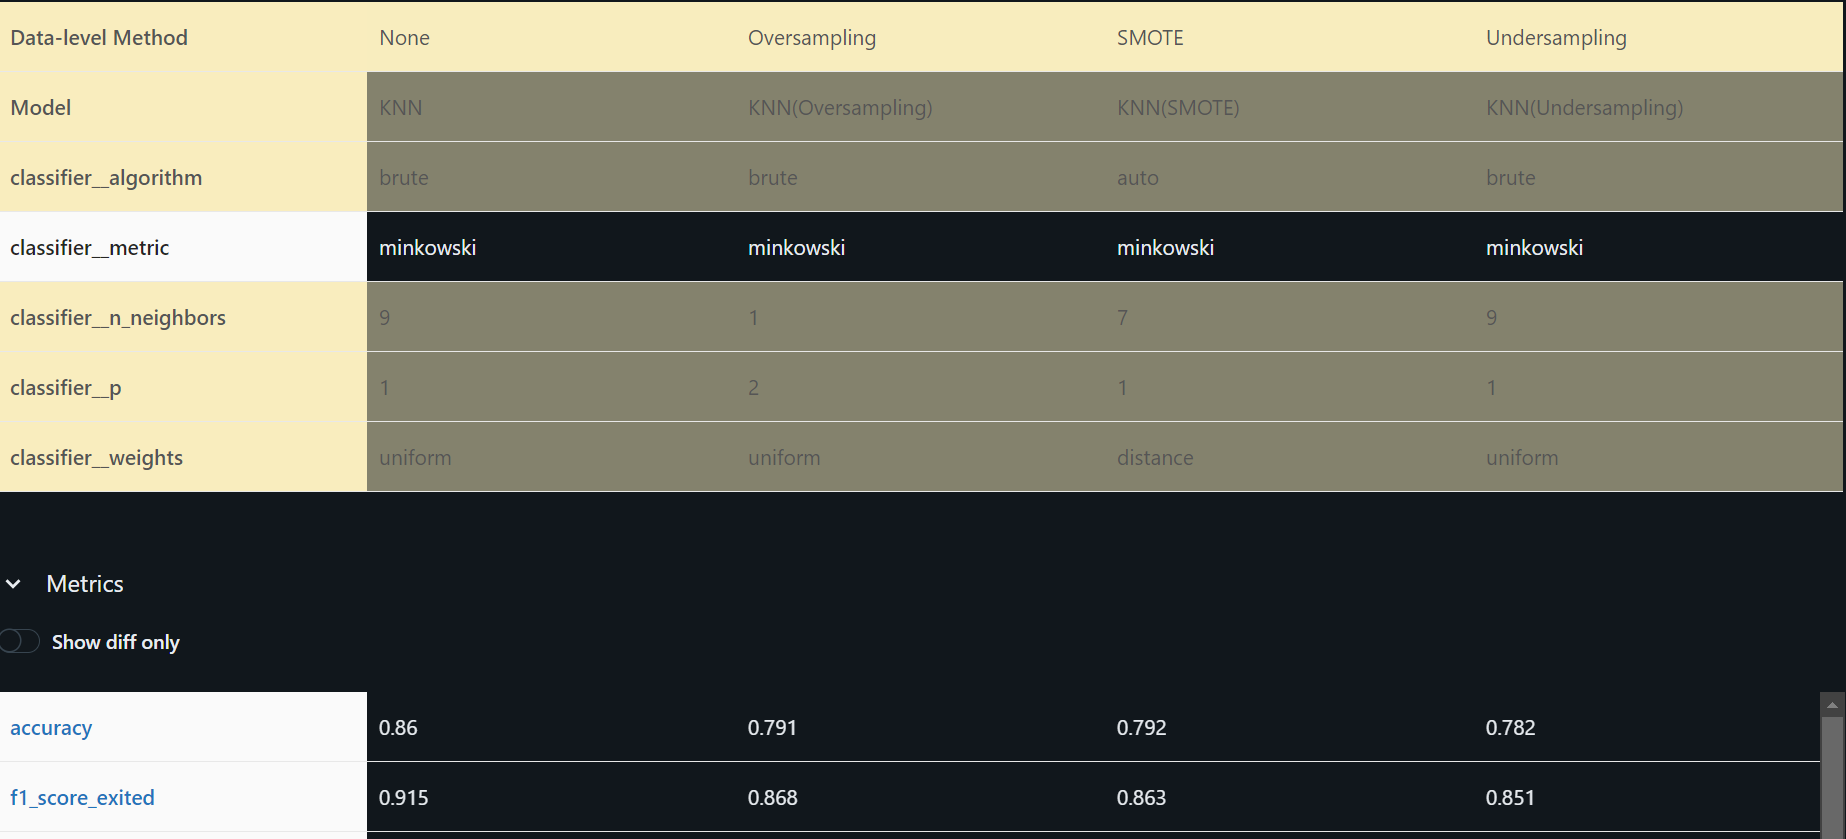
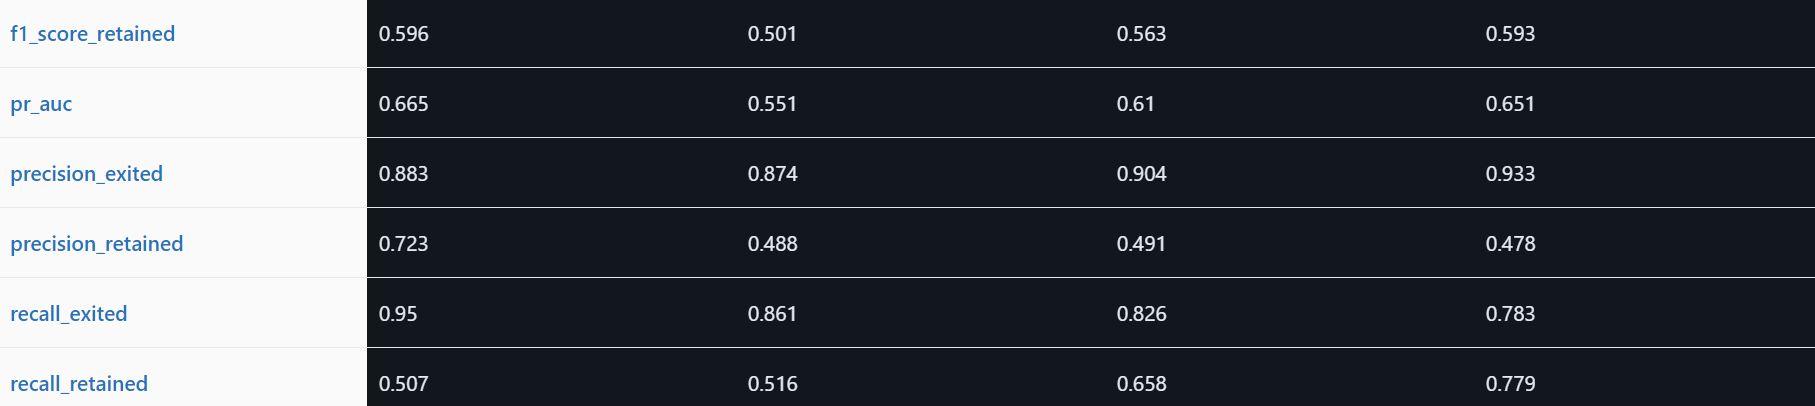
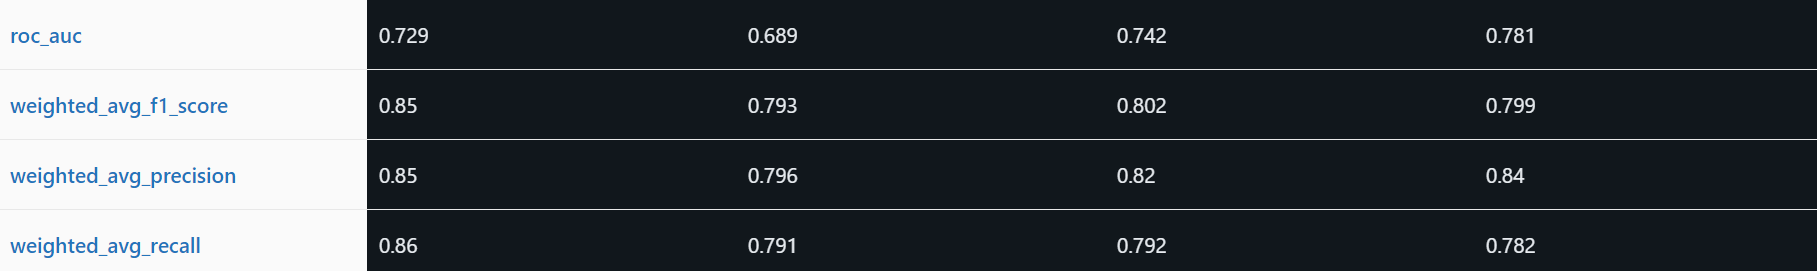
**Model 4** has the highest F1-Score (Class 1) of 0.59, indicating a better balance between precision and recall for the positive class.
It also has the highest ROC AUC of 0.7809, suggesting it performs well in distinguishing between churners and non-churners.
The Precision-Recall AUC of 0.6512 is also relatively high, indicating good performance for the minority class.
Although Model 1 has the highest accuracy, it may not be the best choice due to its lower F1-Score for the positive class. 

### 🌲 5.4 Random Forest <a class="anchor" id="m2"></a>

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.50      0.61       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

ROC AUC: 0.7325816155469799
Precision-Recall AUC: 0.6865857267632882
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 11, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}


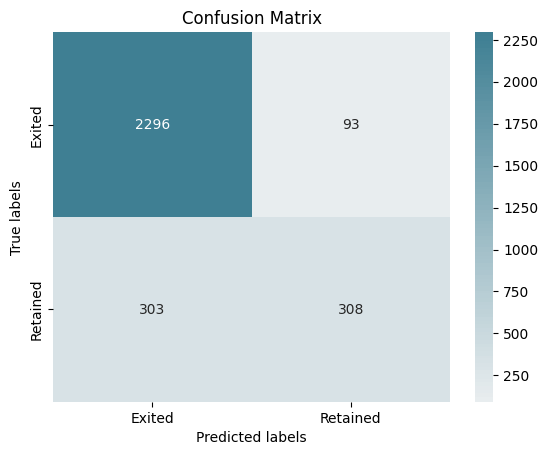

Successfully registered model 'Random Forest'.
2024/07/31 10:38:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest, version 1
Created version '1' of model 'Random Forest'.
2024/07/31 10:38:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/35e3f3cb314a402abfc6e6bee15e180f.
2024/07/31 10:38:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2389
           1       0.54      0.74      0.63       611

    accuracy                           0.82      3000
   macro avg       0.74      0.79      0.75      3000
weighted avg       0.85      0.82      0.83      3000

ROC AUC: 0.7905635417101978
Precision-Recall AUC: 0.6683469258933196
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 11, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}


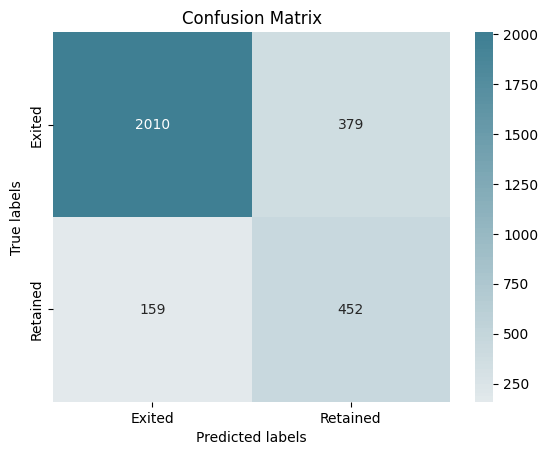

Successfully registered model 'Random Forest(Oversampling)'.
2024/07/31 10:51:22 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest(Oversampling), version 1
Created version '1' of model 'Random Forest(Oversampling)'.
2024/07/31 10:51:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest(Oversampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/60dd5d02eb004930a3711039e015727b.
2024/07/31 10:51:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2389
           1       0.54      0.73      0.62       611

    accuracy                           0.82      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.85      0.82      0.83      3000

ROC AUC: 0.7840168968656808
Precision-Recall AUC: 0.6609169581700153
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 11, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}


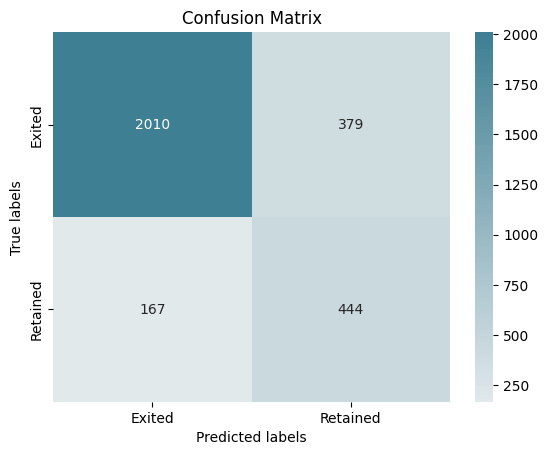

Successfully registered model 'Random Forest(SMOTE)'.
2024/07/31 11:05:22 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest(SMOTE), version 1
Created version '1' of model 'Random Forest(SMOTE)'.
2024/07/31 11:05:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest(SMOTE) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/e65bb2b460b0465d9148ef0cce0e0041.
2024/07/31 11:05:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2389
           1       0.49      0.79      0.61       611

    accuracy                           0.79      3000
   macro avg       0.71      0.79      0.73      3000
weighted avg       0.85      0.79      0.81      3000

ROC AUC: 0.7908355193162332
Precision-Recall AUC: 0.6626088421585166
Tuned hyperparameters - Best parameters :  {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


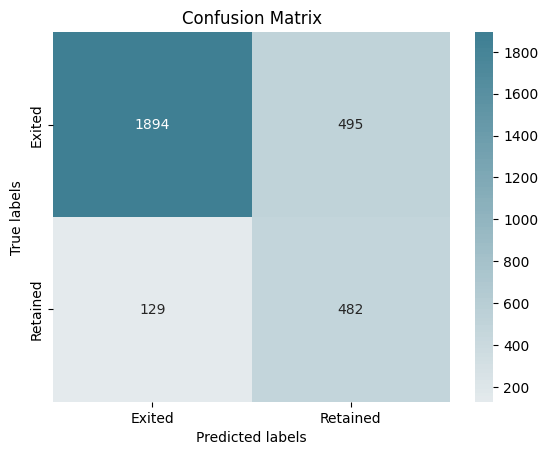

Successfully registered model 'Random Forest(Undersampling)'.
2024/07/31 11:11:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest(Undersampling), version 1
Created version '1' of model 'Random Forest(Undersampling)'.
2024/07/31 11:11:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest(Undersampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/2584af9548ea43109f20e7d6f80e29eb.
2024/07/31 11:11:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('undersample',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 4, 5, 6, 7, 9, 11],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]})

In [23]:
parameters_forest = {
    'classifier__max_depth': [3, 4, 5, 6, 7, 9, 11],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': [None, 'balanced']
}

pipeline_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_forest_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_forest_over = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_forest_under = Pipeline([
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

run_grid_search("Random Forest",X_train, Y_train, X_test, Y_test, pipeline_forest, parameters_forest, 'None')
run_grid_search("Random Forest(Oversampling)",X_train, Y_train, X_test, Y_test, pipeline_forest_over, parameters_forest, 'Oversampling')
run_grid_search("Random Forest(SMOTE)",X_train, Y_train, X_test, Y_test, pipeline_forest_smote, parameters_forest, 'SMOTE')
run_grid_search("Random Forest(Undersampling)",X_train, Y_train, X_test, Y_test, pipeline_forest_under, parameters_forest, 'Undersampling')

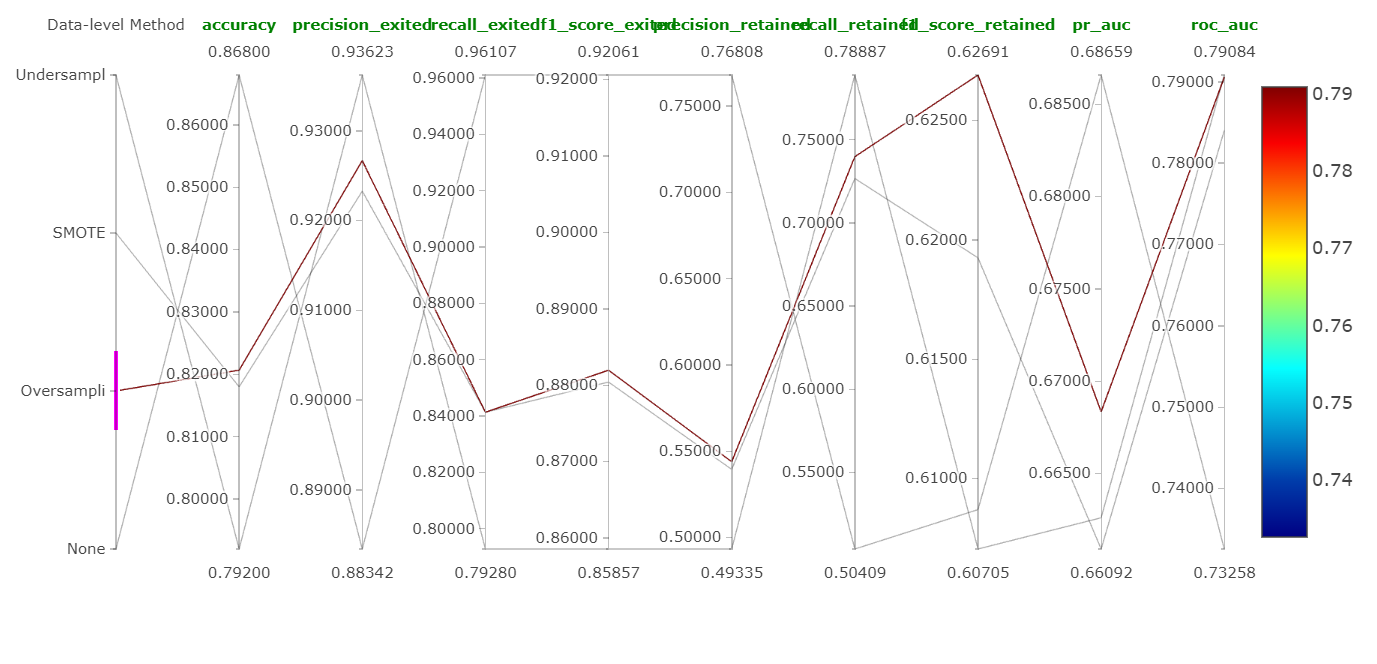
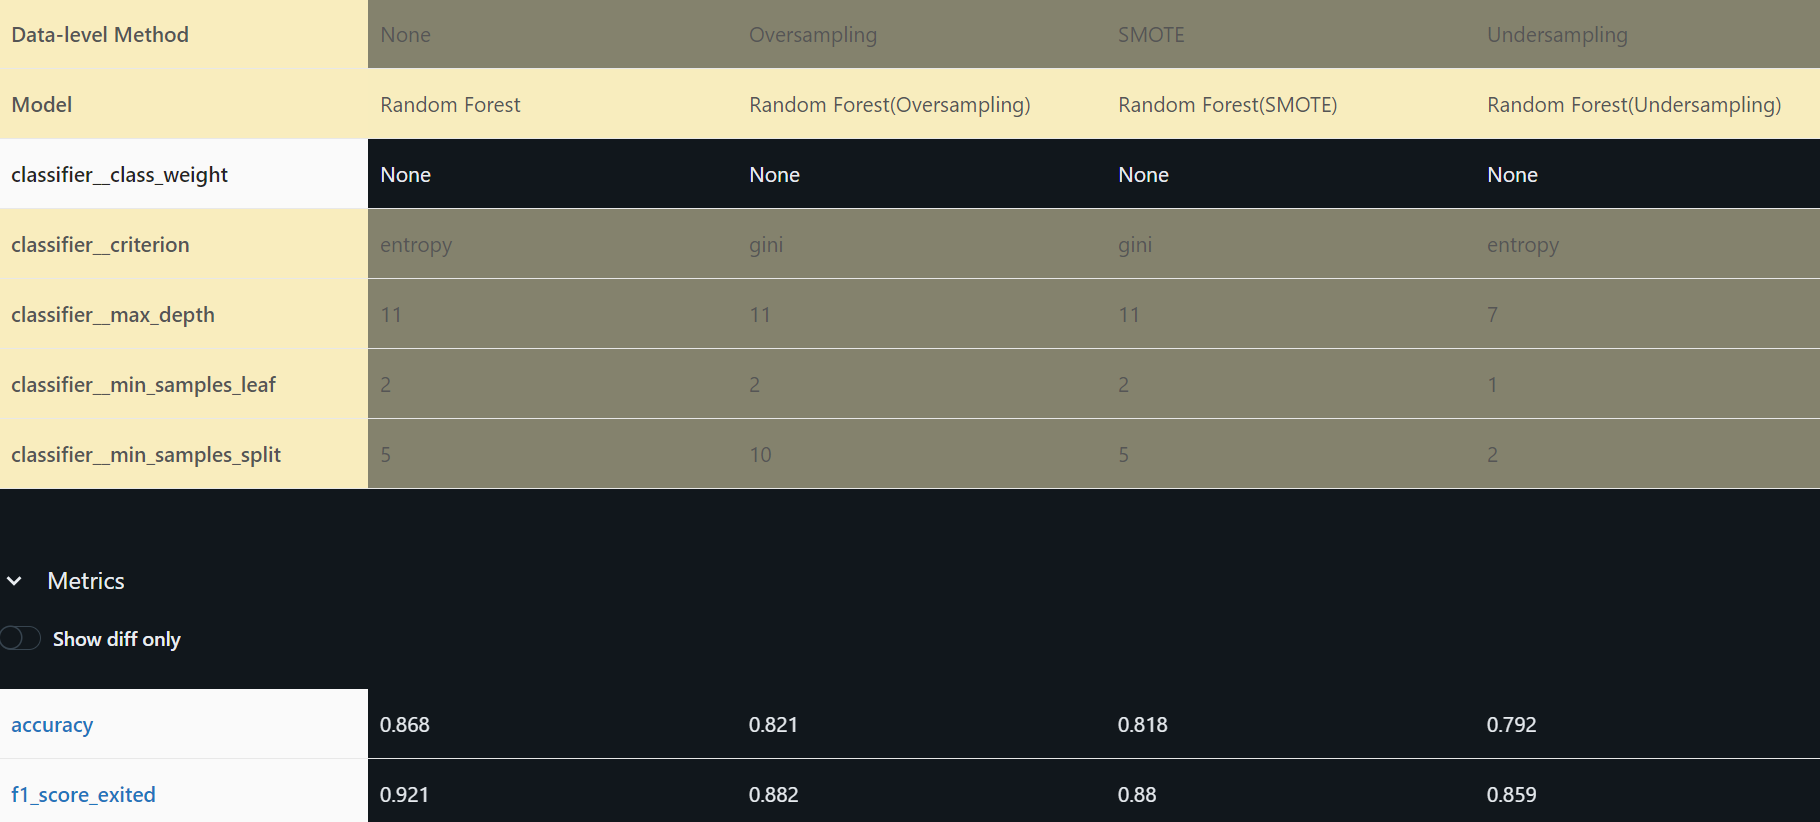
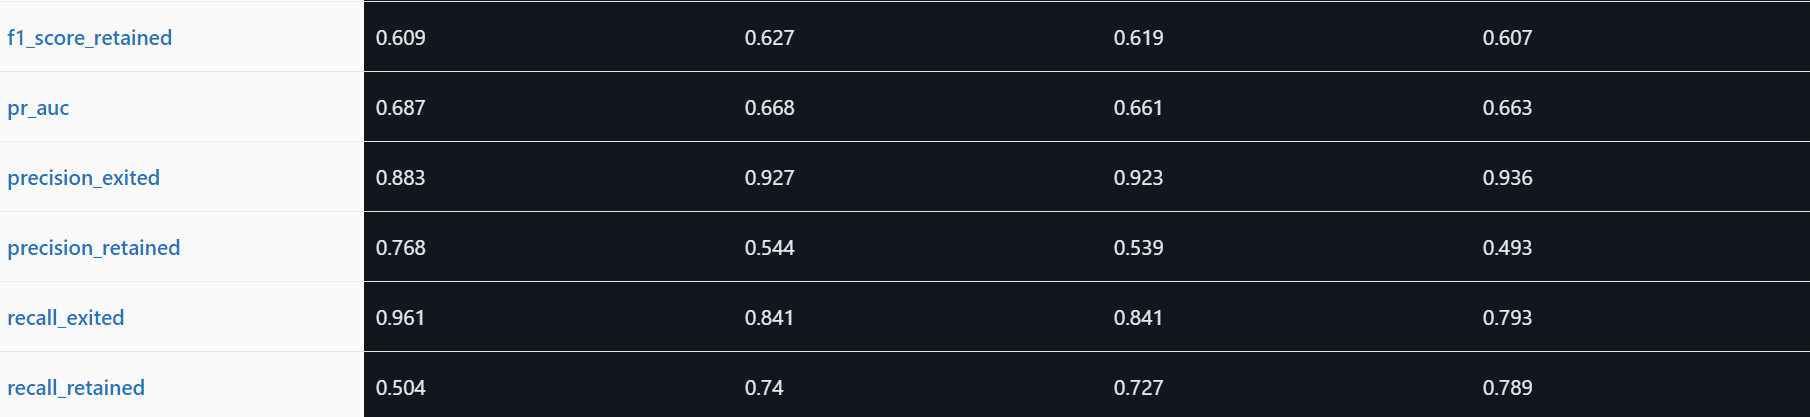
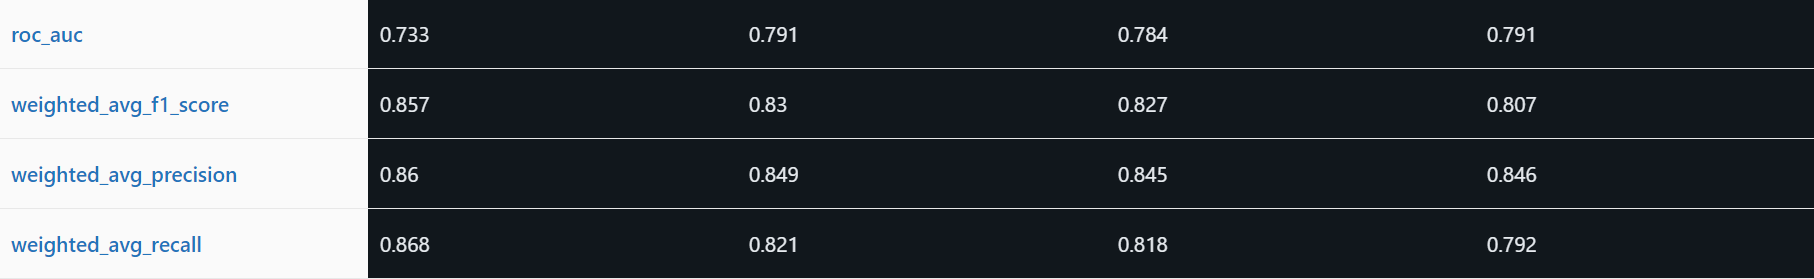
Model 1 has the highest accuracy (0.87) and the highest precision for Class 1 (0.77), but its recall for Class 1 is quite low (0.50). This means it correctly identifies churners less frequently but when it does, it is more often correct.

Model 2 has the highest recall for Class 1 (0.74), meaning it identifies churners more frequently, but its precision for Class 1 is lower (0.54). Its ROC AUC (0.7906) is the highest among the models.

Model 3 has similar metrics to Model 2, with slightly lower ROC AUC (0.7840) and Precision-Recall AUC (0.6609).

Model 4 also has a high recall for Class 1 (0.79) and an accuracy of 0.79, but its precision for Class 1 is the lowest (0.49).

**Model 2** seems to offer the best balance between catching churners (high recall) and overall model performance (high ROC AUC and balanced accuracy).

### 🌟 5.5 XGBoost <a class="anchor" id="m5"></a>

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2389
           1       0.76      0.52      0.62       611

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000

ROC AUC: 0.7407272420854174
Precision-Recall AUC: 0.6904132997189296
Tuned hyperparameters - Best parameters :  {'classifier__colsample_bytree': 0.8, 'classifier__eta': 0.2, 'classifier__max_depth': 3, 'classifier__min_child_weight': 1, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.8}


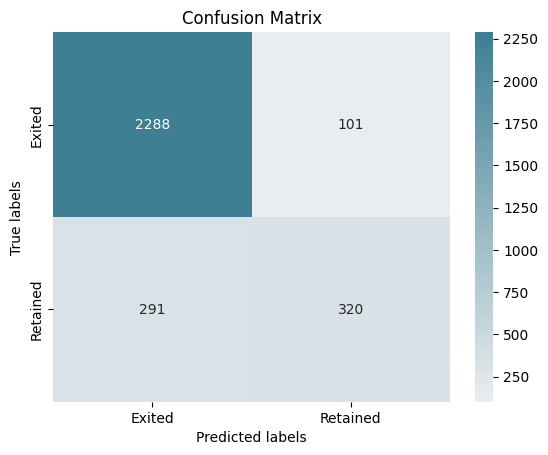

Successfully registered model 'XGBoost'.
2024/07/31 11:26:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 1
Created version '1' of model 'XGBoost'.
2024/07/31 11:26:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/f48da0a36db24781a6d34d70ed1e6077.
2024/07/31 11:26:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2389
           1       0.55      0.70      0.62       611

    accuracy                           0.82      3000
   macro avg       0.74      0.78      0.75      3000
weighted avg       0.84      0.82      0.83      3000

ROC AUC: 0.7788390461190439
Precision-Recall AUC: 0.6580436922712753
Tuned hyperparameters - Best parameters :  {'classifier__colsample_bytree': 0.9, 'classifier__eta': 0.2, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.8}


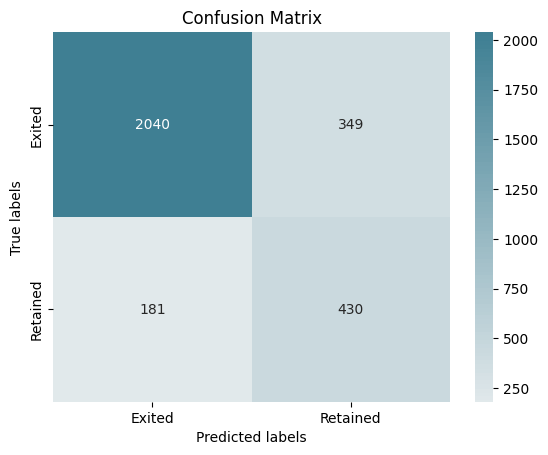

Successfully registered model 'XGBoost(Oversampling)'.
2024/07/31 11:33:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost(Oversampling), version 1
Created version '1' of model 'XGBoost(Oversampling)'.
2024/07/31 11:33:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost(Oversampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/12b3b95eaa114a9cb42167e0100bba77.
2024/07/31 11:33:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2389
           1       0.60      0.72      0.66       611

    accuracy                           0.85      3000
   macro avg       0.76      0.80      0.78      3000
weighted avg       0.86      0.85      0.85      3000

ROC AUC: 0.800170105893145
Precision-Recall AUC: 0.6901405334566759
Tuned hyperparameters - Best parameters :  {'classifier__colsample_bytree': 0.7, 'classifier__eta': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.9}


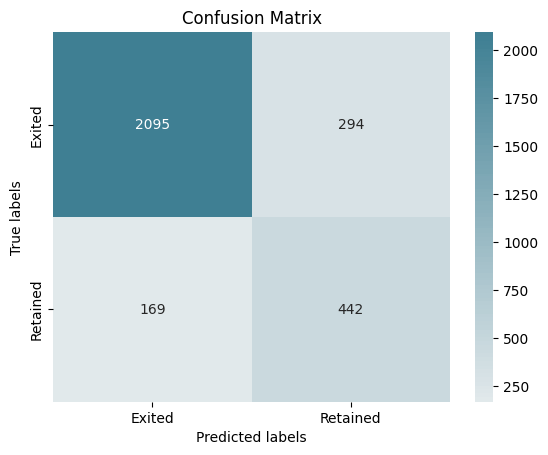

Successfully registered model 'XGBoost(SMOTE)'.
2024/07/31 11:42:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost(SMOTE), version 1
Created version '1' of model 'XGBoost(SMOTE)'.
2024/07/31 11:42:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost(SMOTE) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/ee84bd082019462aa5aef0f987cbff37.
2024/07/31 11:42:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


              precision    recall  f1-score   support

           0       0.94      0.80      0.87      2389
           1       0.51      0.81      0.62       611

    accuracy                           0.80      3000
   macro avg       0.73      0.80      0.75      3000
weighted avg       0.85      0.80      0.82      3000

ROC AUC: 0.8036232623748097
Precision-Recall AUC: 0.6773742710638864
Tuned hyperparameters - Best parameters :  {'classifier__colsample_bytree': 0.8, 'classifier__eta': 0.1, 'classifier__max_depth': 3, 'classifier__min_child_weight': 2, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.8}


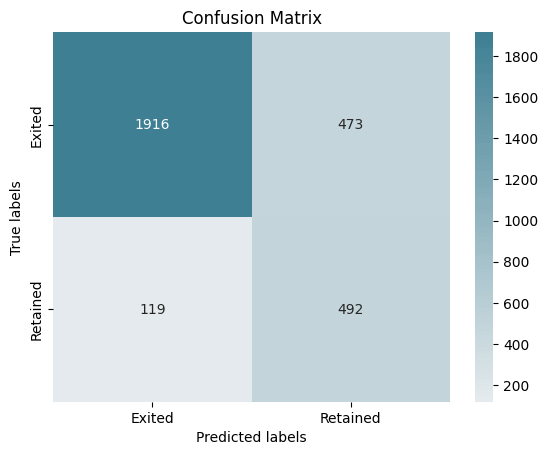

Successfully registered model 'XGBoost(Undersampling)'.
2024/07/31 11:47:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost(Undersampling), version 1
Created version '1' of model 'XGBoost(Undersampling)'.
2024/07/31 11:47:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost(Undersampling) at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0/runs/fd5d0aa008264796b1ff803b512a4539.
2024/07/31 11:47:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/abderrahmane-chafi/BankCustomerChurnAnalysis.mlflow/#/experiments/0.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('undersample',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_round...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__colsample_bytree': [0.7, 0.8, 0.9],
                         'classifier__eta': [0.05, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_child_weight': [1, 2, 3],
                         'classifier__scale_pos_weight': [1, 1.5, 2],
                         'classifier__subsample': [0.7, 0.8, 0.9]})

In [24]:
parameters_XGBoost = {
    'classifier__eta': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__scale_pos_weight': [1, 1.5, 2]
}

pipeline_XGBoost = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_XGBoost_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_XGBoost_over = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_XGBoost_under = Pipeline([
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

run_grid_search("XGBoost",X_train, Y_train, X_test, Y_test, pipeline_XGBoost, parameters_XGBoost, 'None')
run_grid_search("XGBoost(Oversampling)",X_train, Y_train, X_test, Y_test, pipeline_XGBoost_over, parameters_XGBoost, 'Oversampling')
run_grid_search("XGBoost(SMOTE)",X_train, Y_train, X_test, Y_test, pipeline_XGBoost_smote, parameters_XGBoost, 'SMOTE')
run_grid_search("XGBoost(Undersampling)",X_train, Y_train, X_test, Y_test, pipeline_XGBoost_under, parameters_XGBoost, 'Undersampling')

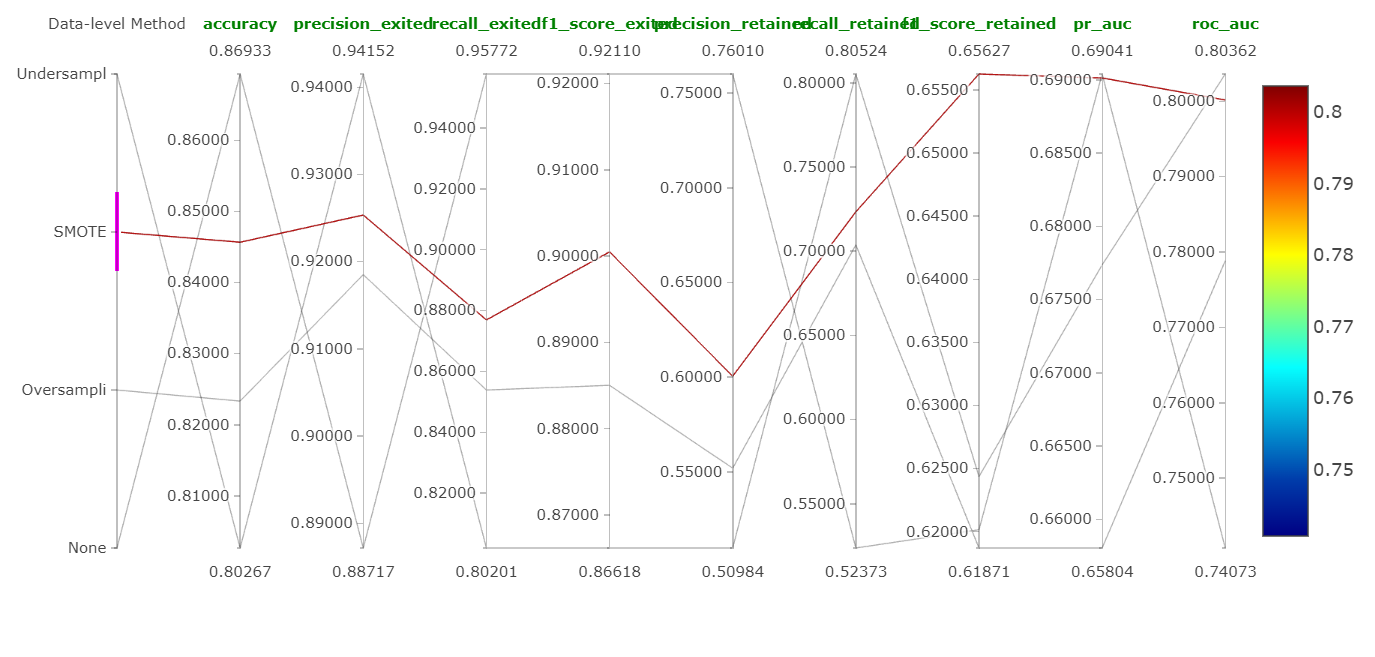
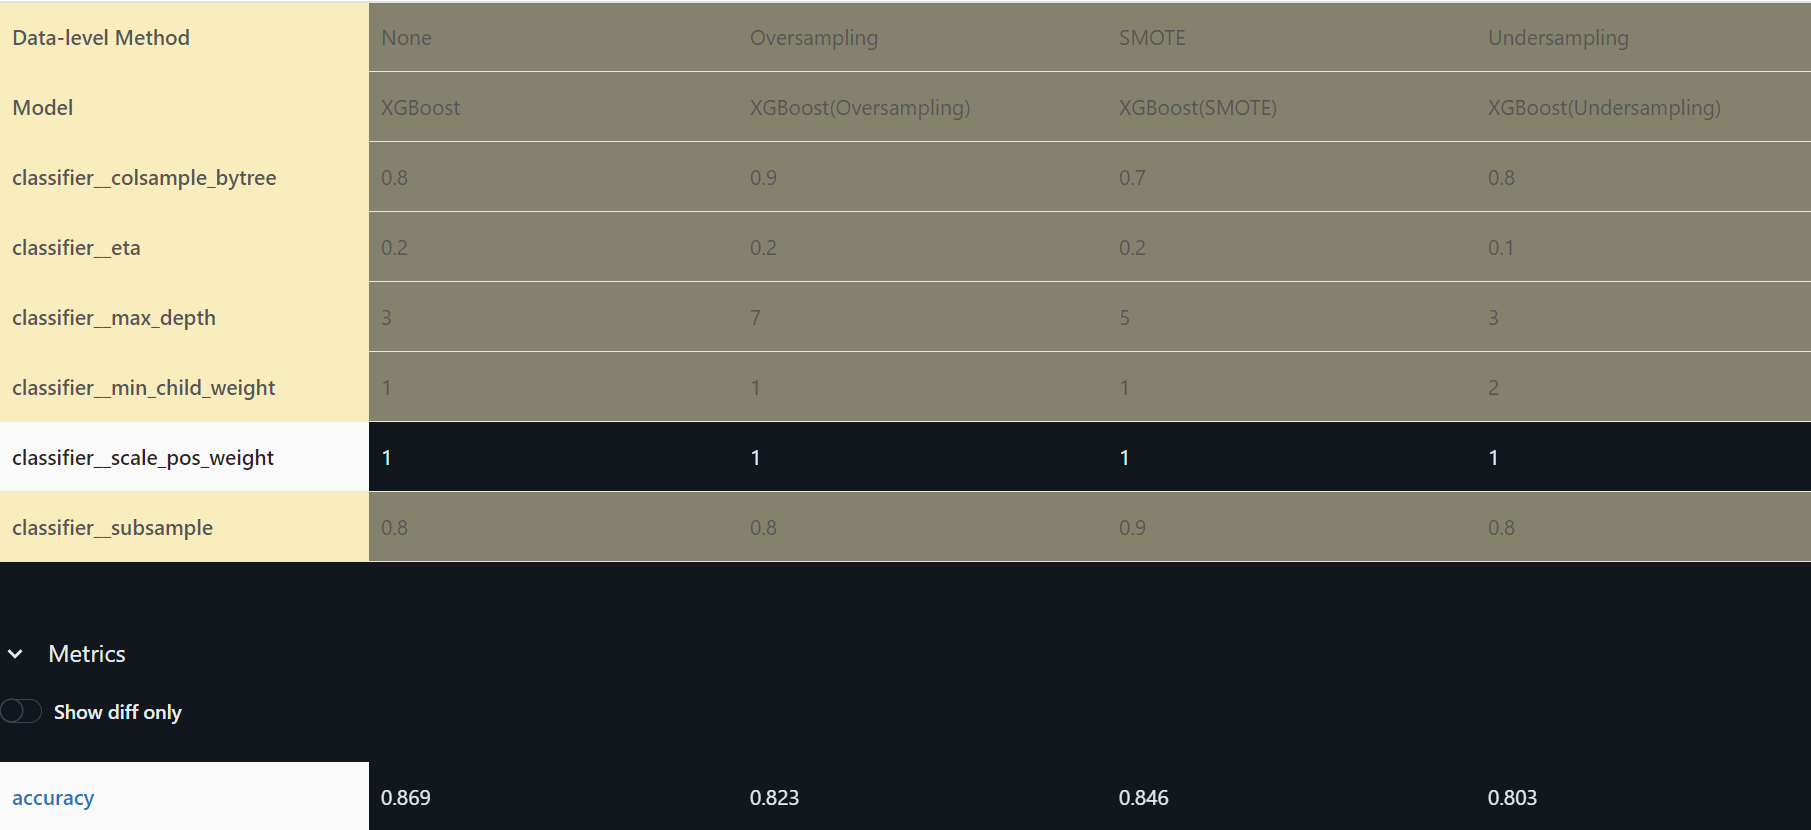
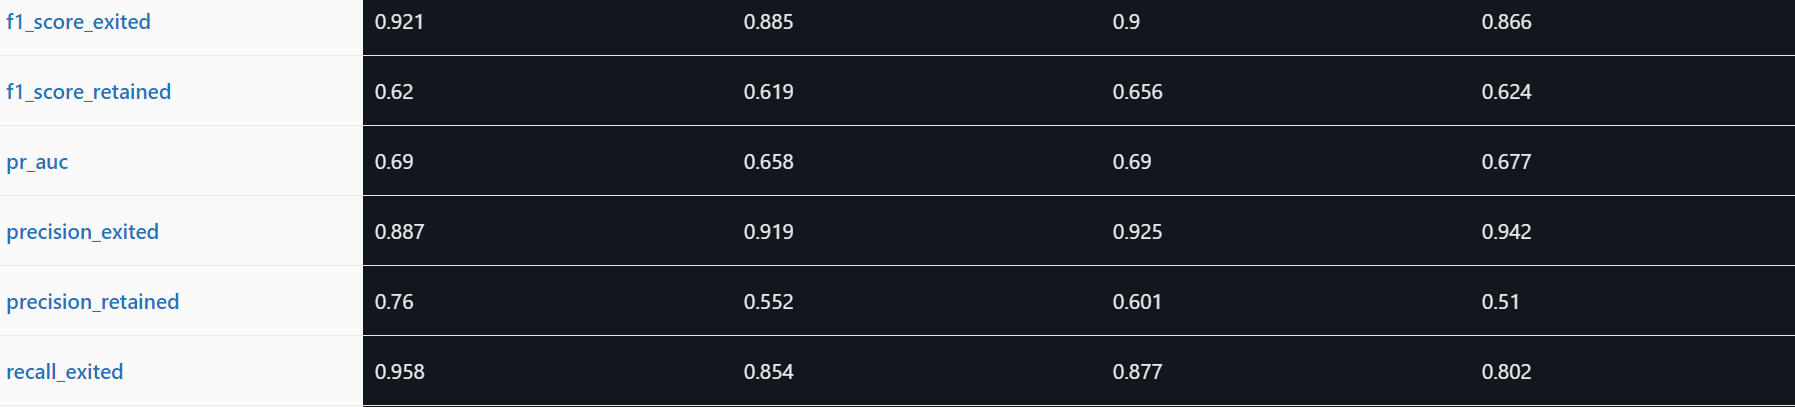
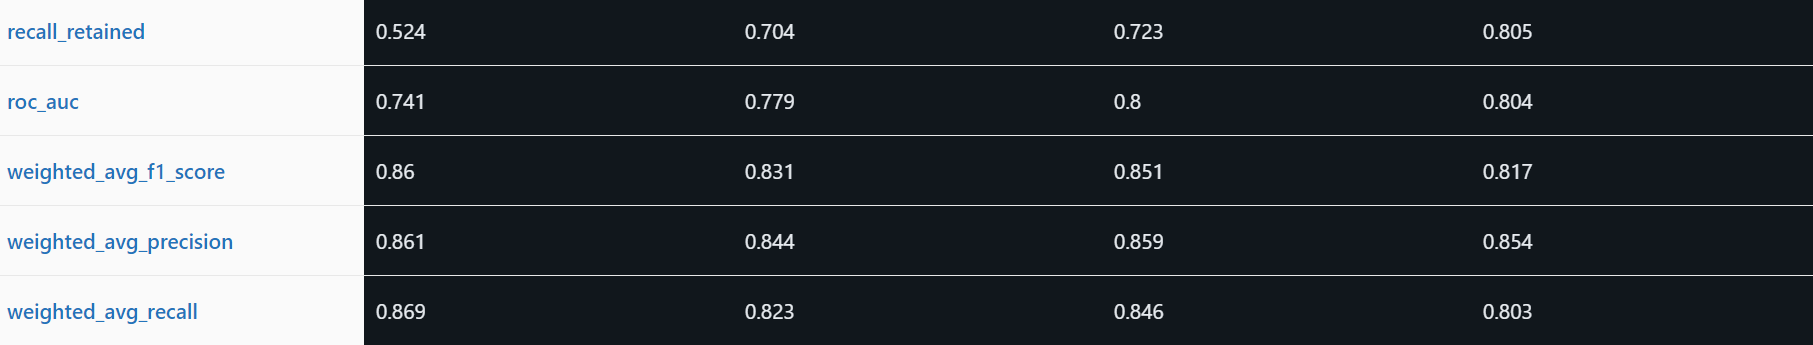
Model 3 seems to offer the best balance between accuracy and the performance on the minority class. It has a good F1-score for class 1, indicating a good balance between precision and recall. Additionally, it shows a high ROC AUC and a competitive Precision-Recall AUC.

Hence, **Model 3** performed the best overall, especially considering the importance of accurately identifying churners (class 1).

### **6.Conclusion** <a class="anchor" id="chapter6"></a>


In [49]:
models_data = [
    {
        'Model name': 'Decision tree',
        'Data-level Method': 'Undersampling',
        'Precision:1': 0.45,
        'Recall:1': 0.77,
        'F1:1': 0.56,
        'Precision:0': 0.93,
        'Recall:0': 0.76,
        'F1:0': 0.83,
        'ROC AUC': 0.762,
        'PR AUC': 0.630,
        'Accuracy': 0.76,
        'Precision': (0.93 + 0.45) / 2,
        'Recall': (0.76 + 0.77) / 2,
        'F1': (0.83 + 0.56) / 2,
        'Confusion Matrix': [[1808, 581], [142, 469]]
    },
    {
        'Model name': 'Logistic regression',
        'Data-level Method': 'SMOTE',
        'Precision:1': 0.40,
        'Recall:1': 0.74,
        'F1:1': 0.52,
        'Precision:0': 0.91,
        'Recall:0': 0.71,
        'F1:0': 0.80,
        'ROC AUC': 0.725,
        'PR AUC': 0.593,
        'Accuracy': 0.72,
        'Precision': (0.91 + 0.40) / 2,
        'Recall': (0.71 + 0.74) / 2,
        'F1': (0.80 + 0.52) / 2,
        'Confusion Matrix': [[1706, 683], [161, 450]]
    },
    {
        'Model name': 'KNN',
        'Data-level Method': 'Undersampling',
        'Precision:1': 0.48,
        'Recall:1': 0.78,
        'F1:1': 0.59,
        'Precision:0': 0.93,
        'Recall:0': 0.78,
        'F1:0': 0.85,
        'ROC AUC': 0.780,
        'PR AUC': 0.651,
        'Accuracy': 0.78,
        'Precision': (0.93 + 0.48) / 2,
        'Recall': (0.78 + 0.78) / 2,
        'F1': (0.85 + 0.59) / 2,
        'Confusion Matrix': [[1870, 519], [135, 476]]
    },
    {
        'Model name': 'Random Forest',
        'Data-level Method': 'Oversampling',
        'Precision:1': 0.54,
        'Recall:1': 0.74,
        'F1:1': 0.63,
        'Precision:0': 0.93,
        'Recall:0': 0.84,
        'F1:0': 0.88,
        'ROC AUC': 0.790,
        'PR AUC': 0.668,
        'Accuracy': 0.82,
        'Precision': (0.54 + 0.93) / 2,
        'Recall': (0.74 + 0.84) / 2,
        'F1': (0.88 + 0.63) / 2,
        'Confusion Matrix': [[2010,379],[159,452]]
    },
    {
        'Model name': 'XGBoost',
        'Data-level Method': 'SMOTE',
        'Precision:1': 0.60,
        'Recall:1': 0.72,
        'F1:1': 0.66,
        'Precision:0': 0.93,
        'Recall:0': 0.88,
        'F1:0': 0.90,
        'ROC AUC': 0.800,
        'PR AUC': 0.690,
        'Accuracy': 0.85,
        'Precision': (0.60 + 0.93) / 2,
        'Recall': (0.72 + 0.88) / 2,
        'F1': (0.90 + 0.66) / 2,
        'Confusion Matrix': [[2095,294],[169,442]]
    }
]

columns = [
    'Model name', 'Data-level Method', 'Precision:1', 'Recall:1', 'F1:1',
    'Precision:0', 'Recall:0', 'F1:0', 'ROC AUC', 'PR AUC', 'Accuracy',
    'Precision', 'Recall', 'F1', 'Confusion Matrix'
]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

report = pd.DataFrame(models_data, columns=columns)
report

,Model name,Data-level Method,Precision:1,Recall:1,F1:1,Precision:0,Recall:0,F1:0,ROC AUC,PR AUC,Accuracy,Precision,Recall,F1,Confusion Matrix
0,Decision tree,Undersampling,0.45,0.77,0.56,0.93,0.76,0.83,0.762,0.630,0.76,0.690,0.765,0.695,"[[1808, 581], [142, 469]]"
1,Logistic regression,SMOTE,0.40,0.74,0.52,0.91,0.71,0.80,0.725,0.593,0.72,0.655,0.725,0.660,"[[1706, 683], [161, 450]]"
2,KNN,Undersampling,0.48,0.78,0.59,0.93,0.78,0.85,0.780,0.651,0.78,0.705,0.780,0.720,"[[1870, 519], [135, 476]]"
3,Random Forest,Oversampling,0.54,0.74,0.63,0.93,0.84,0.88,0.790,0.668,0.82,0.735,0.790,0.755,"[[2010, 379], [159, 452]]"
4,XGBoost,Oversampling,0.60,0.72,0.66,0.93,0.88,0.90,0.800,0.690,0.85,0.765,0.800,0.780,"[[2095, 294], [169, 442]]"


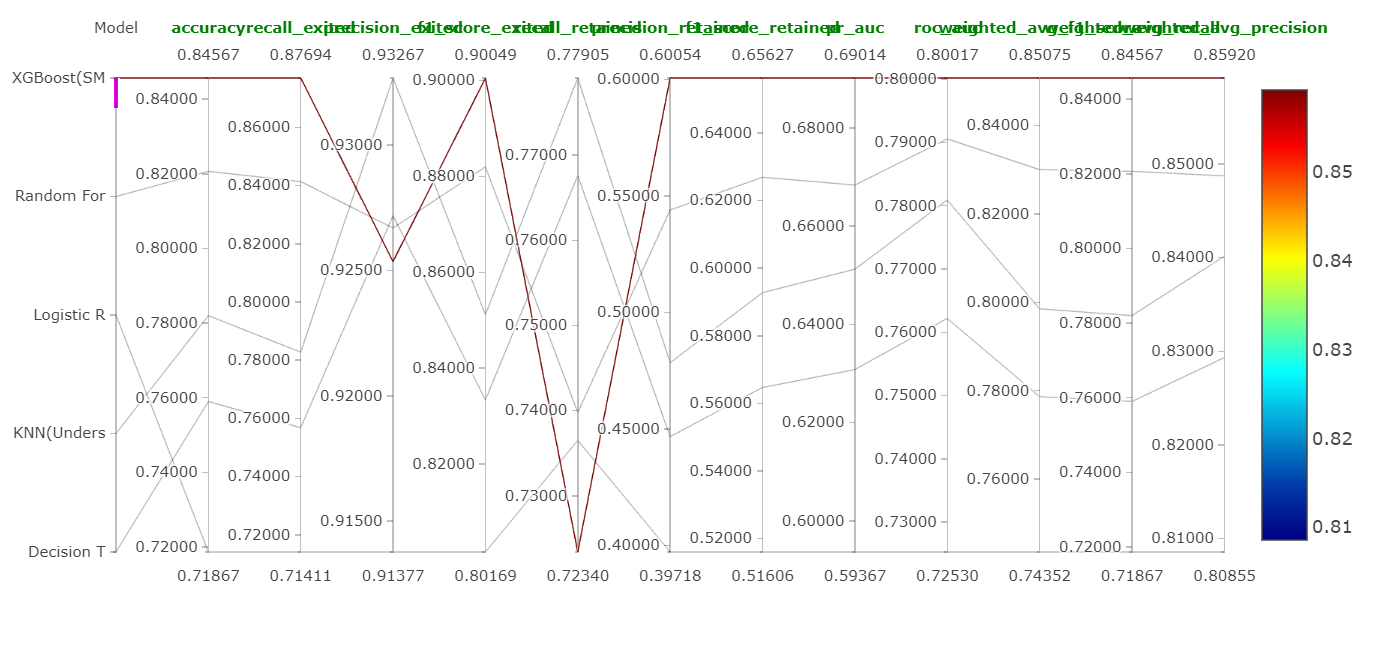
Our database contains 10,000 entries with 18 columns, featuring both categorical and continuous variables. Notably, there are no null values, simplifying our task.

In our analysis, we observed a strong correlation between the 'Complain' variable and our target variable, leading us to exclude 'Complain' from our models. Our exploratory analysis shows that most data is well-distributed, with peculiarities such as the majority of customers being from France, many having no money in their account, and customer ages following a normal distribution. Importantly, our target variable is unbalanced, and while there are some minor outliers, they do not significantly impact our data.

Among the models tested, XGBoost performs the best, achieving high accuracy (0.85), a higher F1-Score for the minority class (0.66), and the highest ROC AUC (0.800) and Precision-Recall AUC (0.690). This suggests it excels in distinguishing between churners and non-churners. Then we have the Random Forest that also performed well taking the second place achieving high accuracy (0.82), a high F1-Score for the minority class (0.63), and a high ROC AUC (0.790) and Precision-Recall AUC (0.668).   KNN also shows good performance, with accuracy (0.78), F1-Score (0.59), and the second-best ROC AUC (0.780) and Precision-Recall AUC (0.668).

The Decision Tree has high accuracy (0.76) but lower F1-Score for the minority class (0.56) and lower AUC scores, indicating less reliability in detecting churners. Logistic Regression performs the worst, with the lowest accuracy (0.72) and F1-Score (0.52) for the minority class. Overall, **XGBoost** is recommended for this churn classification problem due to its superior performance across multiple metrics.

In [21]:
import joblib #module, which is used for serializing and deserializing Python objects, making it useful for saving and loading models.
from sklearn.metrics import accuracy_score

best_model=run_grid_search("XGBoost(SMOTE)",X_train, Y_train, X_test, Y_test, pipeline_XGBoost_smote, parameters_XGBoost, 'SMOTE')
joblib.dump(best_model.best_estimator_, 'best_pipeline_XGBoost_SMOTE.pkl')

# Load the pipeline (though loading the best estimator might be more appropriate)
model = joblib.load('best_pipeline_XGBoost_SMOTE.pkl')

# Define test data
test_data = pd.DataFrame([{
    'Age': 40,
    'Balance': 60000,
    'IsActiveMember': 1,
    'NumOfProducts': 2,
    'France': 1,
    'Germany': 0,
    'Spain': 0,
    'Female': 1
}])


# Make a prediction
prediction = model.predict(test_data)
print(prediction)

# Calculate accuracy on the test set
test_predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, test_predictions)
print(f"Test set accuracy: {accuracy}")

# Save accuracy to a text file
with open('model_accuracy.txt', 'w') as file:
    file.write(f"Test set accuracy: {accuracy}\n")

[0]
Test set accuracy: 0.8456666666666667
